In [1]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
%load_ext tikzmagic
#from __future__ import print_function
import tikzmagic

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib auto
%pylab inline

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# [Теорема Байеса](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0)

__Теорема Байеса__ (или __формула Байеса__) — одна из основных теорем элементарной ***теории вероятностей***, которая позволяет определить ***вероятность*** какого-либо события при условии, что произошло другое статистически ***взаимозависимое*** с ним событие. Другими словами, по формуле Байеса можно более точно пересчитать вероятность, взяв в расчет как ранее известную информацию, так и данные новых наблюдений. Формула Байеса может быть выведена из основных аксиом теории вероятностей, в частности из условной вероятности. Особенность теоремы Байеса заключается в том, что для её практического применения требуется большое количество расчетов, вычислений, поэтому байесовские оценки стали активно использовать только после революции в компьютерных и сетевых технологиях.

## Формулировка
__Формула Байеса__:

$$\boxed{P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}}$$
где
* $P(A)$ — априорная вероятность гипотезы __$A$__ (смысл такой терминологии см. ниже);
* $P(A \mid B)$ — вероятность гипотезы __$A$__ при наступлении события __$B$__ (апостериорная вероятность);
* $P(B \mid A)$ — вероятность наступления события __$B$__ при истинности гипотезы __$A$__;
* $P(B)$ — полная вероятность наступления события __$B$__.


#### [Байесовская вероятность](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C)
Байесовская вероятность — это интерпретация понятия ***вероятности***, используемая в байесовской теории. Вероятность определяется как степень уверенности в истинности ***суждения***. Для определения степени уверенности в истинности суждения при получении новой информации в байесовской теории используется **теорема Байеса**.

In [2]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
A1, A2, A3  = 2000, 5000, 3000
N = sum([A1 +A2 +A3])
print("N=",N)

P1,Q1,   P2,Q2,   P3,Q3  = 0.02,0.18,   0.46,0.04,   0.27,0.03
Ap1, Aq1, p1, q1 =P1*N, Q1*N, P1/(P1+Q1), Q1/(P1+Q1)
Ap2, Aq2, p2, q2 =P2*N, Q2*N, P2/(P2+Q2), Q2/(P2+Q2)
Ap3, Aq3, p3, q3 =P3*N, Q3*N, P3/(P3+Q3), Q3/(P3+Q3)
print("{0:4.0f} +{1:4.0f} =={2:5.0f}  p1={3:<4.2f} q1={4:<4.2f}".format(Ap1,Aq1, Ap1+Aq1,p1,q1))
print("{0:4.0f} +{1:4.0f} =={2:5.0f}  p2={3:<4.2f} q2={4:<4.2f}".format(Ap2,Aq2, Ap2+Aq2,p2,q2))
print("{0:4.0f} +{1:4.0f} =={2:5.0f}  p3={3:<4.2f} q3={4:<4.2f}".format(Ap3,Aq3, Ap3+Aq3,p3,q3))
print("-"*18)
print("{0:4.0f} +{1:4.0f} =={2:5.0f}".format(sum([Ap1,Ap2,Ap3]), sum([Aq1,Aq2,Aq3]),
                                             sum([Ap1,Aq1, Ap2,Aq2, Ap3,Aq3])))

PA1_b = (A1*q1/N)/( A1*q1/N +A2*q2/N +A3*q3/N)
PA2_b = (A2*q2/N)/( A1*q1/N +A2*q2/N +A3*q3/N)
PA3_b = (A3*q3/N)/( A1*q1/N +A2*q2/N +A3*q3/N)
print("PA1|b =={:4.2f}".format(PA1_b))
print("PA2|b =={:4.2f}".format(PA2_b))
print("PA3|b =={:4.2f}".format(PA3_b))
print("PA1|b +PA2|b +PA3|b ==",PA1_b +PA2_b +PA3_b)

N= 10000
 200 +1800 == 2000  p1=0.10 q1=0.90
4600 + 400 == 5000  p2=0.92 q2=0.08
2700 + 300 == 3000  p3=0.90 q3=0.10
------------------
7500 +2500 ==10000
PA1|b ==0.72
PA2|b ==0.16
PA3|b ==0.12
PA1|b +PA2|b +PA3|b == 1.0


No handles with labels found to put in legend.


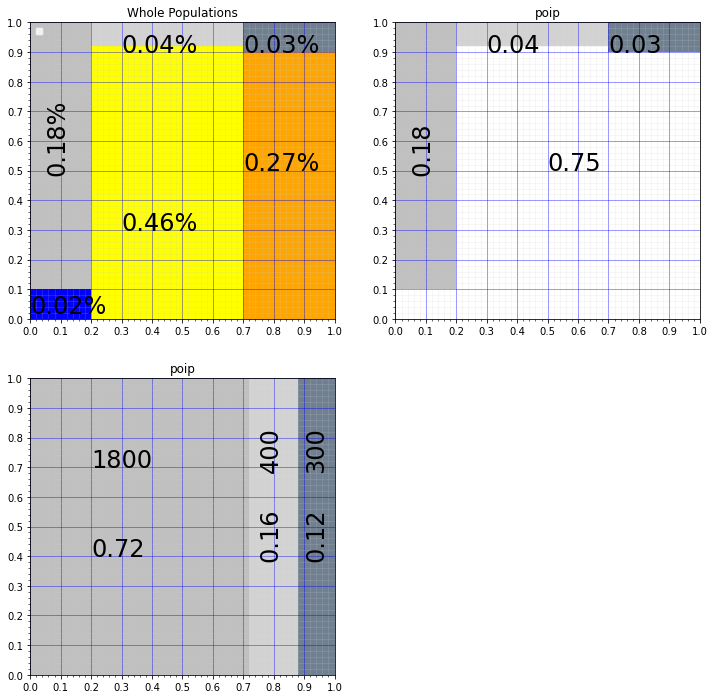

In [3]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
plt.figure(figsize=(12,12))
plt.subplot(221)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')

polygon10 = plt.Polygon([[0.0,0.0],[0.2,0.0],[0.2,1],[0.0,1]], facecolor='blue', linewidth=3)
polygon11 = plt.Polygon([[0.0,0.1],[0.2,0.1],[0.2,1.0],[0.0,1.0]], facecolor='silver')
polygon20 = plt.Polygon([[0.2,0.0],[0.7,0.0],[0.7,1],[0.2,1]], facecolor='yellow')
polygon21 = plt.Polygon([[0.2,0.92],[0.7,0.92],[0.7,1.0],[0.2,1.0]], facecolor='lightgrey')
polygon30 = plt.Polygon([[0.7,0.0],[1.0,0.0],[1.0,1],[0.7,1]], facecolor='#FFA500') #(255,165,0) 255, 126, 0
polygon31 = plt.Polygon([[0.7,0.9],[1.0,0.9],[1.0,1.0],[0.7,1.0]], facecolor='slategrey')

ax = plt.gca()
ax.add_patch(polygon10)
plt.text(0.0, 0.02, "0.02%", size=24)
ax.add_patch(polygon11)
plt.text(0.05, 0.5, "0.18%", size=24, rotation=90)
ax.add_patch(polygon20)
plt.text(0.3, 0.3, "0.46%", size=24)
ax.add_patch(polygon21)
plt.text(0.3, 0.9, "0.04%", size=24)
ax.add_patch(polygon30)
plt.text(0.7, 0.5, "0.27%", size=24)
ax.add_patch(polygon31)
plt.text(0.7, 0.9, "0.03%", size=24)

#plt.gca().invert_yaxis()
plt.title("Whole Populations");
plt.legend(loc='upper left')


plt.subplot(222)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')

polygon11 = plt.Polygon([[0.0,0.1],[0.2,0.1],[0.2,1.0],[0.0,1.0]], facecolor='silver')
polygon21 = plt.Polygon([[0.2,0.92],[0.7,0.92],[0.7,1.0],[0.2,1.0]], facecolor='lightgrey')
polygon31 = plt.Polygon([[0.7,0.9],[1.0,0.9],[1.0,1.0],[0.7,1.0]], facecolor='slategrey')

ax = plt.gca()
ax.add_patch(polygon11)
plt.text(0.05, 0.5, "0.18", size=24, rotation=90)
ax.add_patch(polygon21)
plt.text(0.3, 0.9, "0.04", size=24)
ax.add_patch(polygon31)
plt.text(0.7, 0.9, "0.03", size=24)
plt.text(0.5, 0.5, "0.75", size=24)
plt.title('poip')

plt.subplot(223)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')
polygon11 = plt.Polygon([[0.0, 0],[0.72,0],[0.72,1],[0.0, 1]], facecolor='silver')
polygon21 = plt.Polygon([[0.72,0],[0.88,0],[0.88,1],[0.72,1]], facecolor='lightgrey')
polygon31 = plt.Polygon([[0.88,0],[1.0, 0],[1.0, 1],[0.88,1]], facecolor='slategrey')

ax = plt.gca()
ax.add_patch(polygon11)
plt.text(0.2, 0.7,  "1800", size=24)
plt.text(0.2, 0.4,  "0.72", size=24)
ax.add_patch(polygon21)
plt.text(0.75, 0.7, "400", size=24, rotation=90 )
plt.text(0.75, 0.4, "0.16", size=24, rotation=90 )
ax.add_patch(polygon31)
plt.text(0.9, 0.7,  "300", size=24, rotation=90)
plt.text(0.9, 0.4,  "0.12", size=24, rotation=90)
plt.title('poip')
plt.show()

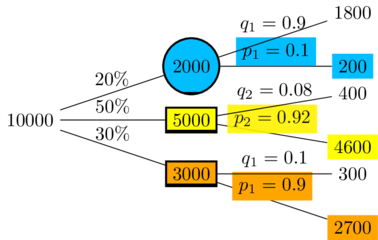

In [4]:
%%tikz

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}

\node {10000}[grow=right, level distance =30mm, sibling distance = 10mm]
child {node [rectangle,fill={c3000},draw=black,line width=1pt]{3000} [sibling distance = 10mm]
       child {node [fill={c3000}] {2700} 
              edge from parent node [fill={rgb,255:red,255;green,165}][above]{$p_1=0.9$}}
       child {node {300}  edge from parent node[above]{$q_1=0.1$}}
       child {edge from parent[draw = none]}
       edge from parent node[above]{$30\%$}
       }
child {node [fill={c5000},draw=black,line width=1pt]{5000} [sibling distance = 10mm]
       child {node [fill={c5000}]{4600} 
              edge from parent node[fill=yellow, opacity=0.9][above]{$p_2=0.92$}}
       child {node {400}  edge from parent node[above]{$q_2=0.08$}}
       edge from parent node[above]{$50\%$}
       }
child {node [circle,fill={c2000},draw=black,line width=1pt]{2000}[sibling distance = 10mm]
       child {edge from parent[draw = none]}
       child {node [fill={c2000}]{200}  
              edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]{$p_1=0.1$}}
       child {node {1800} edge from parent node[above]{$q_1=0.9$}}
       edge from parent node[above]{$20\%$}
       }
;

## Пример 1

$\begin{array}{l:c:l:r:r}
\text{Производитель} & \text{Количество} & \text{вероятность Брака} &\text{Количество} &\text{Рабочие}\\
                     & n_i               & \text{модели =} q_i      &\text{Брака}      &\text{телефоны}\\ \hline
\text{Российский}    & 2000              & 0.9                      & 1800             &200\\
\text{iPhone}        & 5000              & 0.08                     & 400              &4600\\
\text{Samsung}       & 3000              & 0.1                      & 300              &2700\\ \hline
\text{Всего}         & 10000             &                          & 2500             &7500\\
\end{array}$

Все они продаются в единственном магазине в Москве. Радиолюбитель из глубинки проездом купил один. Телефон оказался поломанный. Спрашивается, с какой вероятностью этот телефон **Российский**, **iPhone**, **Samsung** ?

* Событие $B$ — поломанный телефон, 
* событие $A_i$ — деталь произведена заводом $i$. 

Тогда $P(A_i)= \dfrac {n_i}{N}$, где $N=n_1+n_2 + n_3$, а $P(B|A_i)=q_i$.

По формуле полной вероятности

$
\boxed{
P(B)=\sum_{i=1}^3 P(B \mid A_i)P(A_i) = \dfrac{q_1 \cdot n_1}{N} + \dfrac{q_2 \cdot n_2}{N} + \dfrac{q_3 \cdot n_3}{N} = 
\dfrac{0.9 \cdot 2000 + 0.08 \cdot 5000 + 0.1 \cdot 3000}{10000} = \\
= \dfrac{2500}{10000}= \boxed{0.25 = P(B)}
}
$

По формуле Байеса получим:

$
\boxed{
\begin{array}{lll}
P(A_1 \mid B) &=\dfrac{P(B \mid A_1)P(A_1)}{P(B)} &=\dfrac{P(B \mid A_1)P(A_1)}
{P(B \mid A_1)P(A_1)+P(B \mid A_2)P(A_2)+P(B \mid A_3)P(A_3)} =\\
 &=\dfrac{\dfrac {q_1 n_1}{N}}{\dfrac {q_1 n_1}{N} + \dfrac {q_2 n_2}{N} +\dfrac {q_3 n_3}{N}} &=
\dfrac{\dfrac {0.9\cdot 2000}{10000}}{ \dfrac {0.9 \cdot 2000}{10000} +\dfrac {0.08 \cdot 5000}{10000} +\dfrac {0.10 \cdot 30000}{10000}}=\\
 &= \dfrac{\dfrac{1800}{10000}}{\dfrac{1800 + 400 + 300}{10000}} &= \dfrac {1800}{2500} =  \boxed{\color{red}{0.72} = P(A_1 \mid B)}
\end{array}
}
$

$
\boxed{
\begin{array}{lll}
P(A_2 \mid B) &=\dfrac{P(B \mid A_2)P(A_2)}{P(B)} &=\dfrac{P(B \mid A_2)P(A_2)}
{P(B \mid A_1)P(A_1)+P(B \mid A_2)P(A_2)+P(B \mid A_3)P(A_3)} =\\
 &=\dfrac{\dfrac {q_2 n_2}{N}}{\dfrac {q_1 n_1}{N} + \dfrac {q_2 n_2}{N} +\dfrac {q_3 n_3}{N}} &=
\dfrac{\dfrac {0.08\cdot 5000}{10000}}{ \dfrac {0.9 \cdot 2000}{10000} +\dfrac {0.08 \cdot 5000}{10000} +\dfrac {0.10 \cdot 30000}{10000}}=\\
 &= \dfrac{\dfrac{400}{10000}}{\dfrac{1800 + 400 + 300}{10000}} &= \dfrac {400}{2500} =  \boxed{\color{red}{0.16} = P(A_2 \mid B)}
\end{array}
}
$

$
\boxed{
\begin{array}{lll}
P(A_3 \mid B) &=\dfrac{P(B \mid A_3)P(A_3)}{P(B)} &=\dfrac{P(B \mid A_3)P(A_3)}
{P(B \mid A_1)P(A_1)+P(B \mid A_2)P(A_2)+P(B \mid A_3)P(A_3)} =\\
 &=\dfrac{\dfrac {q_3 n_3}{N}}{\dfrac {q_1 n_1}{N} + \dfrac {q_2 n_2}{N} +\dfrac {q_3 n_3}{N}} &=
\dfrac{\dfrac {0.10\cdot 3000}{10000}}{ \dfrac {0.9 \cdot 2000}{10000} +\dfrac {0.08 \cdot 5000}{10000} +\dfrac {0.10 \cdot 30000}{10000}}=\\
 &= \dfrac{\dfrac{300}{10000}}{\dfrac{1800 + 400 + 300}{10000}} &= \dfrac {300}{2500} =  \boxed{\color{red}{0.12} = P(A_1 \mid B)}
\end{array}
}
$

#### Prob & Stats - Bayes Theorem (12 of 24) What if We Run the Test Again?

Тестирование **1000** человек на наличие болезни происходит в следущих условиях:

* **1%** являются больными
* **10** являются **больными**
* **990** **здоровы**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

In [5]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;
P_disease = 0.01; P_helthy = 0.99 

P_disease = 0.01; P_helthy = 1 - P_disease

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:3.1f}) + #2({1:5.1f}) == #5({2:5.1f})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:3.1f}) + #4({1:5.1f}) == #6({2:5.1f})".format(Test3_FN, Test4_TN, Test6_N))


P_disease1 =((TP**1)*P_disease)/((TP**1)*P_disease + (FP**1)*P_helthy)
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease1,1-P_disease1))
P_disease2 =((TP**2)*P_disease)/((TP**2)*P_disease + (FP**2)*P_helthy)
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease2,1-P_disease2))
P_disease3 =((TP**3)*P_disease)/((TP**3)*P_disease + (FP**3)*P_helthy)
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease3,1-P_disease3))
print("-----------------"*2)

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

#1(9.8) + #2( 49.5) == #5( 59.3)
#3(0.2) + #4(940.5) == #6(940.7)
P(D|+)=0.1652613827993255  P(H|+)=0.8347386172006745 
P(D|+)=0.7950989320307973  P(H|+)=0.2049010679692027 
P(D|+)=0.9870224116396645  P(H|+)=0.0129775883603355 
----------------------------------
P(D|+)=0.1652613827993255  P(H|+)=0.8347386172006745 
P(D|+)=0.7950989320307973  P(H|+)=0.2049010679692027 
P(D|+)=0.9870224116396645  P(H|+)=0.0129775883603355 


$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                      & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5}\\  
\boldsymbol{+}         & 98\%   = 9.8                     & 5\%  = 49.5                       & 59.3   \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    & \boxed{6}\\ 
\boldsymbol{-}         & 2\%  = 0.2                       & 95\% = 940.5                      & 940.7   \\ \hline
                       & 10                               & 990                               & 1000 \\ \hline
\end{array}
$

### Первый способ из 13 параграфа ниже:

Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при 

$\color{red}{Первом}$ ***положительном*** тестировании:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (1\%)}  {(98\%)(1\%) + (5\%)(99\%)} &= \color{red}{16.53}\% \\
\end{array}
}
\quad
\boxed{
P(H \mid +) = 83.47\%
}
$

$\color{blue}{Втором}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (\color{red}{16.53\%})}  {(98\%)(\color{red}{16.53\%}) + (5\%)(\color{red}{83.47\%})} &= \color{blue}{79.50989\%}  \\
\end{array}
}
\quad
\boxed{P(H \mid +) = 20.49\%}
$

$\color{magenta}{Третьем}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ \color{blue}{(79.51\%)}}  {(98\%)\color{blue}{(79.51\%)} + (5\%)\color{blue}{(20.49\%)}} &= 
\color{magenta}{98.70224\%}  \\
\end{array}
}
\quad
\boxed{P(H \mid +) = 1.2977\%}
$

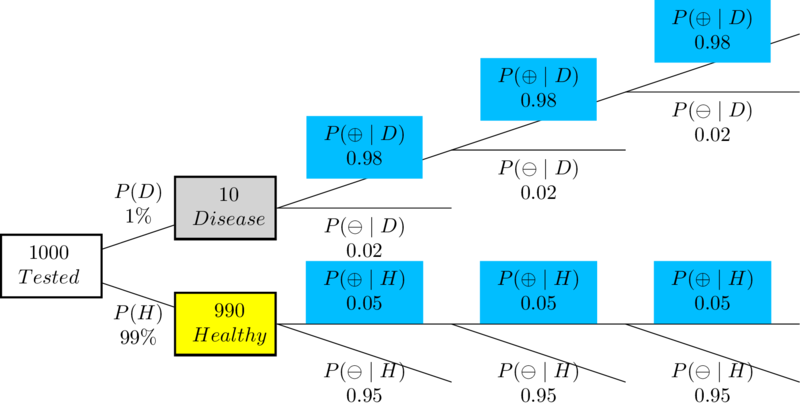

In [6]:
%%tikz -s 800,800 -sc 1  -f png

\usetikzlibrary{positioning,decorations.pathreplacing}

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}
\definecolor{c0040}{RGB}{211,211,211} %'lightgrey') # 211,211,211 #d3d3d3

\node [rectangle,draw=black,line width=1pt,text width=1.5cm]
{$\begin{array}{c} 1000\\ Tested\end{array}$}
[grow=right, level distance =30mm, sibling distance = 20mm]
child {node [fill={c5000},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 990\\ Healthy\end{array}$}
       [ level distance =9mm, sibling distance = 15mm]
       {child {{}
               [level distance =30mm,sibling distance = 10mm]
               child {{}
                      edge from parent node[below]
                      {$\begin{array}{c}P(\ominus \mid H)\\0.95\end{array}$}} % 1 level
               child {{}
                      child {{}
                             edge from parent node[below]
                             {$\begin{array}{c}P(\ominus \mid H)\\0.95\end{array}$} % 2 level
                            }
                      child {{}
                             child {{}
                                    edge from parent node[below]
                                    {$\begin{array}{c}P(\ominus \mid H)\\0.95\end{array}$}} % 3 level
                             child {{}
                                    edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                                    {$\begin{array}{c}P(\oplus \mid H)\\0.05\end{array}$} % 3 level
                                   }
                             child {edge from parent[draw = none]}
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                             {$\begin{array}{c}P(\oplus \mid H)\\0.05\end{array}$} % 2 level
                            }
                      child {edge from parent[draw = none]}
                      edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                      {$\begin{array}{c}P(\oplus \mid H)\\0.05\end{array}$}
                     }
               child {edge from parent[draw = none]}
               }
        }
       edge from parent node[below]{$\begin{array}{c}P(H)\\99\%\end{array}$}
       }
child {node [rectangle,fill={c0040},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 10\\ Disease\end{array}$}
       [level distance =9mm,sibling distance = 10mm]
       {child {{}
               [level distance =30mm,sibling distance = 10mm]
               child {edge from parent[draw = none]}
               child {{}
                      child {edge from parent[draw = none]}
                      edge from parent node[below]
                      {$\begin{array}{c}P(\ominus \mid D)\\0.02\end{array}$} % 1 level
                     }
               child {{}
                      child {edge from parent[draw = none]}
                      child {{}
                             edge from parent node[below]
                             {$\begin{array}{c}P(\ominus \mid D)\\0.02\end{array}$} % 2 level
                            }
                      child {{}
                             child {edge from parent[draw = none]}
                             child {{}
                                    edge from parent node[below]
                                    {$\begin{array}{c}P(\ominus \mid D)\\0.02\end{array}$} % 3 level
                                    }
                             child {{}
                                    edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                                    {$\begin{array}{c}P(\oplus \mid D)\\0.98\end{array}$} % 1 level % 3 level
                                   }
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                             {$\begin{array}{c}P(\oplus \mid D)\\0.98\end{array}$} % 2 level
                            }
                      edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][above]
                      {$\begin{array}{c}P(\oplus \mid D)\\0.98\end{array}$} % 1 level
                     }
               }
       }
       edge from parent node[above]{$\begin{array}{c}P(D)\\1\%\end{array}$}
      }
;

### Второй способ из русской Wikipwdia:

$
\boxed{
\begin{array}{lll}
P(D \mid +)     &= \boxed{\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}}\\
P(D \mid +,+)   &= \boxed{\dfrac{A^2\cdot P} {A^2\cdot P + B^2\cdot (1 - P)}}\\
P(D \mid +,+,+) &= \boxed{\dfrac{A^3\cdot P} {A^3\cdot P + B^3\cdot (1 - P)}}
\end{array}
}
$

Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при 

$\color{red}{Первом}$ ***положительном*** тестировании:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{0.01\cdot 0.98^1} {0.01\cdot 0.98^1 + 0.99\cdot 0.05^1} &= \color{red}{16.53}\% \\
\end{array}
}
$
$
\boxed{
P(H \mid +) = 83.47\%
}
$

$\color{blue}{Втором}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{lll}
P(D \mid +, +)  &= \dfrac{0.01\cdot 0.98^2} {0.01\cdot 0.98^2 + 0.99\cdot 0.05^2} &= \\
             &= \dfrac{0.01\cdot \big[0.98 \cdot 0.98\big] } {0.01\cdot \big[0.98 \cdot 0.98\big] + 0.99\cdot \big[0.05 \cdot 0.05 \big] } &= \color{blue}{79.50989\%}  \\
\end{array}
}
$
$
\boxed{P(H \mid +) = 20.49\%}
$

$\color{magenta}{Третьем}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{lll}
P(D \mid +, +, +)  &= \dfrac{0.01\cdot 0.98^3} {0.01\cdot 0.98^3 + 0.99\cdot 0.05^3} &= \\
             &= \dfrac{0.01\cdot \big[ 0.98 \cdot 0.98 \cdot 0.98 \big] } {0.01\cdot \big[ 0.98 \cdot 0.98 \cdot 0.98 \big] + 0.99\cdot \big[ 0.05 \cdot 0.05 \cdot 0.05 \big] } &=
\color{magenta}{98.70224\%}  \\
\end{array}
}
$
$
\boxed{P(H \mid +) = 1.2977\%}
$

$
\boxed{
\begin{array}{lll}
P(D \mid +)     &= \boxed{\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}}\\
P(D \mid +,+)   &= \boxed{\dfrac{A^2\cdot P} {A^2\cdot P + B^2\cdot (1 - P)}}\\
P(D \mid +,+,+) &= \boxed{\dfrac{A^3\cdot P} {A^3\cdot P + B^3\cdot (1 - P)}}
\end{array}
}
$

$
P(D \mid +)  = \dfrac{A\cdot P(D)} {A\cdot P(D) + B\cdot (1 - P(D))} =\boxed{\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}}
$


$
\begin{array}{lll}
P(D \mid +,+) &=
\dfrac{A\cdot \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right]} {A\cdot \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right] + B\cdot \left(1 - \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right]\right)} &= \\
 &=
\dfrac{A\cdot \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right]} {A\cdot \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right] + B\cdot \left(1 - \left[\dfrac{A\cdot P} {A\cdot P + B\cdot (1 - P)}\right]\right)} &= \\
   &= \dfrac{\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)}} {\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)} + 
B\cdot \left(\dfrac{A\cdot P + B\cdot (1 - P) - A\cdot P} {A\cdot P + B\cdot (1 - P)}\right)} &= \\
 &= \dfrac{\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)}} {\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)} + 
B\cdot \left(\dfrac{B\cdot (1 - P)} {A\cdot P + B\cdot (1 - P)}\right)} &= \\
 &= \dfrac{\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)}} {\dfrac{A^2\cdot P} {A\cdot P + B\cdot (1 - P)} + 
\dfrac{B ^2\cdot (1 - P)} {A\cdot P + B\cdot (1 - P)}} &=\\
 &= \boxed{\dfrac{A^2\cdot P} {A^2\cdot P + B^2\cdot (1 - P)}}
\end{array}
$

### [Prob & Stats - Bayes Theorem (1 of 24) What is Bayes Theorem?](https://youtu.be/gTaxZplxFEw)

$
\begin{array}{c:ll}
\boxed{P(A|B) =  \frac{P(B \mid A)\, P(A)}{P(B)}} & 
\begin{array}{lll}
\text{Where}\\
P(A \mid B) =& \text{Вероятность события } A \\
            & \text{ когда прозошло событие } B=True\\
P(B \mid A) =& \text{Вероятность события } B \\
            & \text{ когда прозошло событие } A=True\\
P(A)        =& \text{Вероятность события } A \text{ независимо от } B\\
P(B)        =& \text{Вероятность события } B \text{ независимо от } A\\
\end{array}
\end{array}
$


$
\begin{array}{ccc}
\boxed{P(U \mid +) =  \frac{P(+ \mid U)\ P(U)}{P(+)}} &
\boxed{P(D \mid +) =  \frac{P(+ \mid D)\ P(D)}{P(+)}} \\
P(+) = P(TRUE +) + P(FALSE +)
\\
+ = \text{Test POSITIVE}
\end{array}
$

|    | |
|:---|-|
|**SENSITIVITY** (чувствительность, восприимчивость)<br/>**Чувствительность** (истинно положительный)<br/>Тест показывает вероятность того, что больной субъект будет классифицирован именно как больной.<br><br>**SPECIFICITY**<br/>**Специфичность** |![Sensitivity and specificity](data/Sensitivity_and_specificity.svg "Sensitivity and specificity")|

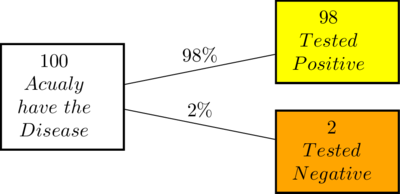

In [7]:
%%tikz

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}

\node [rectangle,draw=black,line width=1pt,text width=2cm]
{$\begin{array}{c} 100\\ Acualy\\ have\ the\\Disease\end{array}$}
[grow=right, level distance =50mm, sibling distance = 20mm]
child {node [rectangle,fill={c3000},draw=black,line width=1pt,text width=2cm]
       {$\begin{array}{c} 2\\ Tested\\ Negative\end{array}$}
       [sibling distance = 10mm]
       edge from parent node[above]{$2\%$}
       }
child {node [fill={c5000},draw=black,line width=1pt,text width=2cm]
       {$\begin{array}{c} 98\\ Tested\\ Positive\end{array}$}
       [sibling distance = 10mm]
       edge from parent node[above]{$98\%$}
      }
;

### [Prob & Stats - Bayes Theorem (2 of 24) What is the Sensitivity of a Test?](https://youtu.be/pKE3v7tBp3w)

**Sensitivity** (also called the **true positive rate**, the **recall**, or **probability of detection** in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). It is often mistakenly confused with the detection limit, while the detection limit is calculated from the analytical sensitivity, not from the epidemiological sensitivity.

**Sensitivity/Чувствительность** (истинно положительная пропорция) отражает долю положительных результатов, которые правильно идентифицированы как таковые. Иными словами, чувствительность диагностического теста показывает вероятность того, что больной субъект будет классифицирован именно как больной:

Тестируются **все больные**/положительные объекты $100$: 
* $98$ больных будут определено правильно **$+$**
* $2$ определяется неправильно **$-$** $2$ имеющих болезнь будут отмечены $FALSE\ NEGATIVE$

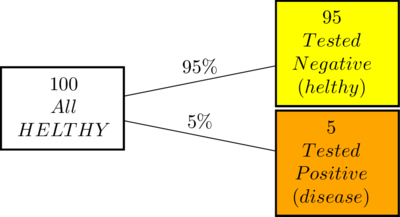

In [8]:
%%tikz

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}

\node [rectangle,draw=black,line width=1pt,text width=2cm]
{$\begin{array}{c} 100\\All\\ HELTHY\end{array}$}
[grow=right, level distance =50mm, sibling distance = 20mm]
child {node [rectangle,fill={c3000},draw=black,line width=1pt,text width=2cm]
       {$\begin{array}{c} 5\\ Tested\\ Positive\\(disease)\end{array}$}
       [sibling distance = 10mm]
       edge from parent node[above]{$5\%$}
       }
child {node [fill={c5000},draw=black,line width=1pt,text width=2cm]
       {$\begin{array}{c} 95\\ Tested\\ Negative\\(helthy)\end{array}$}
       [sibling distance = 10mm]
       edge from parent node[above]{$95\%$}
      }
;

### [Prob & Stats - Bayes Theorem (3 of 24) What is the Specificity of a Test?](https://youtu.be/8i62dc74mc0)

**Specificity** (also called the **true negative rate**) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

**Specificity/Специфичность** (истинно отрицательная пропорция) отражает долю отрицательных результатов, которые правильно идентифицированы как таковые, то есть вероятность того, что здоровые субъекты будут классифицированы именно как здоровые.:

Тестируются **полностью здоровые**/положительные объекты $100$: 
* $95$ здоровых будут определено правильно **$-$**
* $5$ определяется неправильно **$+$** $5$ здоровых будут отмечены как больные $FALSE\ POSITIVE$

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.0392 0.048 11.46788990825688 0.4495412844036697 0.5504587155963303


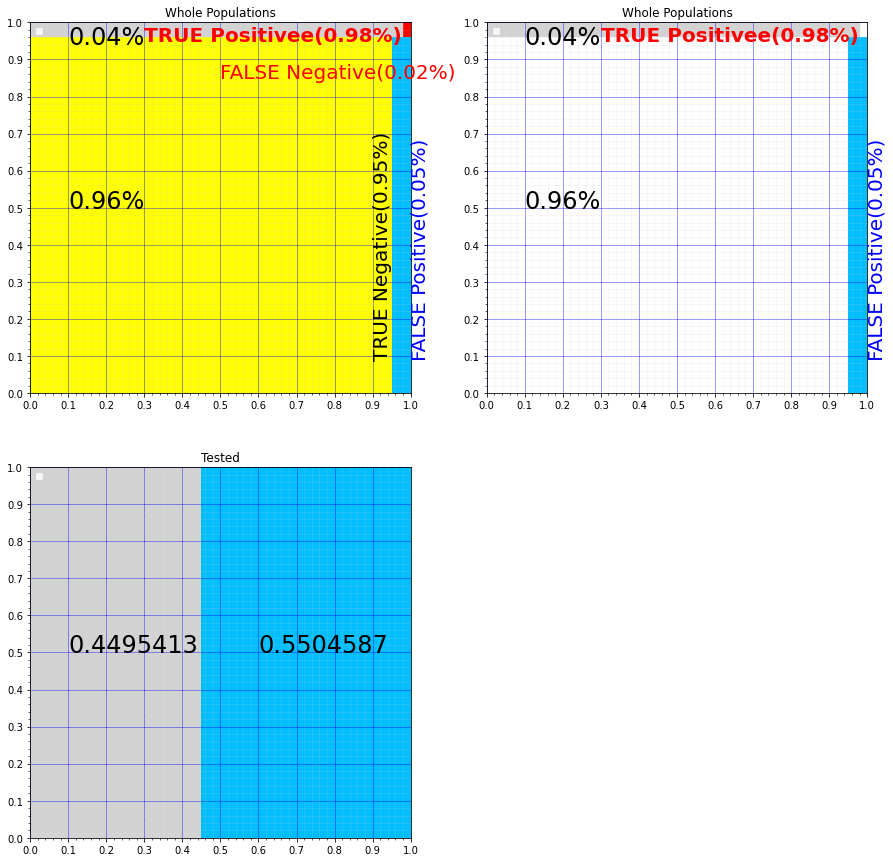

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')

polygon10 = plt.Polygon([[0.0,0.0], [1.0,0.0], [1.0,1.0],[0.0,1.0]], facecolor='yellow')
polygon11 = plt.Polygon([[0.0,0.96],[0.98,0.96],[0.98,1.0],[0.0,1.0]], facecolor='lightgrey') # 211,211,211 #d3d3d3
polygon1A = plt.Polygon([[0.98,0.96],[1.0,0.96],[1.0,1.0],[0.98,1.0]], facecolor='red')
polygon1B = plt.Polygon([[0.95,0.0],[1.0,0.0],[1.0,0.96],[0.95,0.96]], facecolor='#01BEFF') #RGB 1,190,255

ax = plt.gca()
ax.add_patch(polygon10)
plt.text(0.1, 0.5, "0.96%", size=24)
ax.add_patch(polygon11)
plt.text(0.1, 0.94, "0.04%", size=24)
ax.add_patch(polygon1A)
plt.text(0.3, 0.95, "TRUE Positivee(0.98%)", size=20, color='red', fontweight='bold')
plt.text(0.5, 0.85, "FALSE Negative(0.02%)", size=20, color='red')
ax.add_patch(polygon1B)
plt.text(0.9, 0.1, "TRUE Negative(0.95%)", size=20, rotation=90)
plt.text(1.0, 0.1, "FALSE Positive(0.05%)", size=20, rotation=90, color='blue')

#plt.gca().invert_yaxis()
plt.title("Whole Populations");
plt.legend(loc='upper left')


plt.subplot(222)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')

polygon10 = plt.Polygon([[0.0,0.0], [1.0,0.0], [1.0,1.0],[0.0,1.0]], facecolor='yellow')
polygon11 = plt.Polygon([[0.0,0.96],[0.98,0.96],[0.98,1.0],[0.0,1.0]], facecolor='lightgrey') # 211,211,211 #d3d3d3
polygon1A = plt.Polygon([[0.98,0.96],[1.0,0.96],[1.0,1.0],[0.98,1.0]], facecolor='red')
polygon1B = plt.Polygon([[0.95,0.0],[1.0,0.0],[1.0,0.96],[0.95,0.96]], facecolor='#01BEFF') #RGB 1,190,255

ax = plt.gca()
#ax.add_patch(polygon10)
plt.text(0.1, 0.5, "0.96%", size=24)
ax.add_patch(polygon11)
plt.text(0.1, 0.94, "0.04%", size=24)
#ax.add_patch(polygon1A)
plt.text(0.3, 0.95, "TRUE Positivee(0.98%)", size=20, color='red', fontweight='bold')
#plt.text(0.95, 0.85, "FALSE Negative(0.02\%)", size=20, color='red')
ax.add_patch(polygon1B)
#plt.text(0.9, 0.1, "TRUE Negative(0.95\%)", size=20, rotation=90)
plt.text(1.0, 0.1, "FALSE Positive(0.05%)", size=20, rotation=90, color='blue')

#plt.gca().invert_yaxis()
plt.title("Whole Populations");
plt.legend(loc='upper left')


TP = 0.04*0.98
FP = 0.96*0.05
k = 1/sum(TP+FP)
print(TP, FP, k, k*TP, k*FP)

plt.subplot(223)
plt_view_grid(plt, 'on',(0,1,0,1),(0.1,0.02,0.1,0.02),major_color='b')

polygonT11 = plt.Polygon([[0.0,0.0],[k*TP,0.0],[k*TP,1.0],[0.0,1.0]], facecolor='lightgrey') # 211,211,211 #d3d3d3
polygonT1B = plt.Polygon([[k*TP,0.0],[1.0,0.0],[1.0,1.0],[k*TP,1.0]], facecolor='#01BEFF') #RGB 1,190,255

ax = plt.gca()
ax.add_patch(polygonT11)
plt.text(0.1, 0.5, "{0:.7}".format(k*TP), size=24)
ax.add_patch(polygonT1B)
plt.text(0.6, 0.5, "{0:.7}".format(k*FP), size=24)

#plt.gca().invert_yaxis()
plt.title("Tested");
plt.legend(loc='upper left')

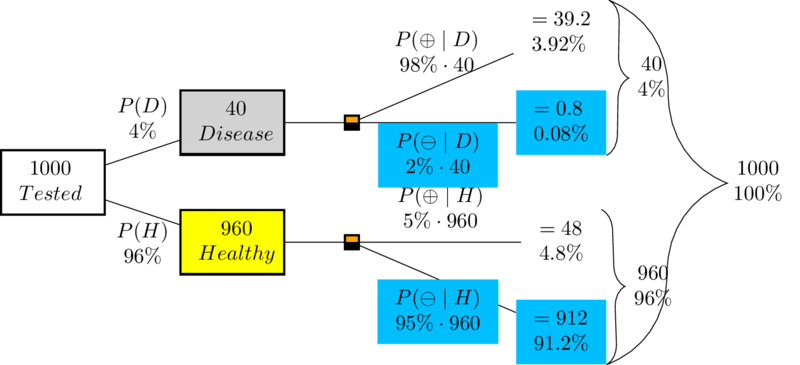

In [10]:
%%tikz -s 800,600 -sc 1  -f png

\usetikzlibrary{positioning,decorations.pathreplacing}

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}
\definecolor{c0040}{RGB}{211,211,211} %'lightgrey') # 211,211,211 #d3d3d3

\node [rectangle,draw=black,line width=1pt,text width=1.5cm]
{$\begin{array}{c} 1000\\ Tested\end{array}$}
[grow=right, level distance =30mm, sibling distance = 20mm]
child {node [fill={c5000},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 960\\ Healthy\end{array}$}
       [ level distance =10mm,sibling distance = 15mm]
       {child {child {node [rectangle,fill={c3000},draw=black,line width=1pt]
                      {}
                      [level distance =35mm,sibling distance = 15mm]
                      child {node [fill={c2000}](TrueN)
                             {$\begin{array}{l}= 912\\91.2\%\end{array}$}
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][below]
                             {$\begin{array}{c}P(\ominus \mid H)\\95\% \cdot 960\end{array}$}}
                      child {node (FalseP)
                             {$\begin{array}{l}= 48\\4.8\%\end{array}$}
                             edge from parent node[above]
                             {$\begin{array}{c}P(\oplus \mid H)\\5\% \cdot 960\end{array}$}}
                      child {edge from parent[draw = none]}
                      }
               }
        }
       edge from parent node[below]{$\begin{array}{c}P(H)\\96\%\end{array}$}
       }
child {node [rectangle,fill={c0040},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 40\\ Disease\end{array}$}
       [level distance =10mm,sibling distance = 15mm]
       {child {child {node [rectangle,fill={c3000},draw=black,line width=1pt]
                      {}
                      [level distance =35mm,sibling distance = 15mm]
                      child {edge from parent[draw = none]}
                      child {node [fill={c2000}](FalseN)
                             {$\begin{array}{l}= 0.8\\0.08\%\end{array}$}
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][below]
                             {$\begin{array}{c}P(\ominus \mid D)\\2\% \cdot 40\end{array}$}}
                      child {node (TrueP)
                             {$\begin{array}{l}= 39.2\\3.92\%\end{array}$}
                             edge from parent node[above]
                             {$\begin{array}{c}P(\oplus \mid D)\\98\% \cdot 40\end{array}$}}
                      }
              }
       }
       edge from parent node[above]{$\begin{array}{c}P(D)\\4\%\end{array}$}
      }
;
\draw[decorate,decoration={brace,mirror,amplitude=10pt}] (FalseN.south east) -- (TrueP.north east)
node [midway,xshift=0.2cm,right] 
{$\begin{array}{c}40\\4\%\end{array}$};
\draw[decorate,decoration={brace,mirror,amplitude=10pt}] (TrueN.south east) -- (FalseP.north east)
node [midway,xshift=0.2cm,right] 
{$\begin{array}{c}960\\96\%\end{array}$};
\draw[decorate,decoration={brace,mirror,amplitude=2cm, meta-amplitude=1.5cm}] (TrueN.south east) --  (TrueP.north east)
node [midway,xshift=1.8cm,right] 
{$\begin{array}{c}1000\\100\%\end{array}$};

### [Prob & Stats - Bayes Theorem (4 of 24) A More Comprehensive Equation](https://youtu.be/QAYmrCuL2rQ)

**После** тестирования **1000** больных получили такой результат при качестве тестов:

* **4%** являются больными 
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\boxed{
\begin{array}{ccc}
P(D \mid +) =  \dfrac{P(+ \mid D)\ P(D)}{P(+)} &=
\dfrac{\overbrace{P(+ \mid D)\ P(D)}^{\text{tested + TRUE POSITIVE}} } {\underbrace{P(+ \mid D)P(D) + P(+ \mid H)P(H)}_{\text{All tested +/POSITIVE}} }
\end{array}
}
$

In [11]:
N = 1000
P_disease = 0.04; P_helthy = 0.96 
TP = 0.98; FN = 0.02;
TN = 0.95; FP = 0.05;

print(TP*P_disease/(P_disease*TP + P_helthy*FP))

0.4495412844036697


Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при **положительном** тестировании:

$
\begin{array}{ccc}
P(D \mid +) =  \dfrac{(98\%)\ (4\%)}{(98\%)(4\%) +(5\%)(96\%)} &= 44.95\%
\end{array}
$

### [Prob & Stats - Bayes Theorem (5 of 24) A More Comprehensive Equation: Another Method](https://youtu.be/3cpEQEYn2PE)

**После** тестирования **1000** больных получили такой результат при качестве тестов:

* **4%** являются больными 
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                       & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus  & \boxed{2} \text{ FALSE }\bigoplus &          \\  
\boldsymbol{+}         & 98\%                              & 5\%                               &          \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    &          \\ 
\boldsymbol{-}         & 2\%                               & 95\%                              &          \\ \hline
                       &  40             &   960          & 1000 \\ \hline
\end{array}
$

$
\boxed{
\begin{array}{ccc}
P(D \mid +) =  \dfrac{\boxed{1}}{\boxed{1} + \boxed{2}} &= \dfrac{P(+ \mid D)\ P(D)}{P(+)} &=
\dfrac{\overbrace{P(+ \mid D)\ P(D)}^{\text{tested + TRUE POSITIVE}} } {\underbrace{P(+ \mid D)P(D) + P(+ \mid H)P(H)}_{\text{All tested +/POSITIVE}} }
\end{array}
}
$

In [12]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;
P_disease = 0.01; P_helthy = 0.99 

P_disease = 0.04; P_helthy = 1-P_disease

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:4.1f}) + #2({1:5.1f}) == #5({2:5.1f})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:4.1f}) + #4({1:5.1f}) == #6({2:5.1f})".format(Test3_FN, Test4_TN, Test6_N))
print("   {0:4.0f}  +    {1:5.0f}  ==  {2:5.0f}".format(N_P_disease, N_P_helthy, N))

#1(39.2) + #2( 48.0) == #5( 87.2)
#3( 0.8) + #4(912.0) == #6(912.8)
     40  +      960  ==   1000


### [Prob & Stats - Bayes Theorem (6 of 24) A More Comprehensive Equation: Another Method](https://youtu.be/RYpejUyHvaY)

**После** тестирования больных получили такой результат при качестве тестов:

* **4%** являются больными
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                       & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus  & \boxed{2} \text{ FALSE }\bigoplus &          \\  
\boldsymbol{+}         & 98\%   = 39.2                     & 5\%  = 48                         &  87.2    \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    &          \\ 
\boldsymbol{-}         & 2\%  = 0.8                        & 95\% =  912                       & 912.8    \\ \hline
                       &  40                               &   960                             & 1000 \\ \hline
\end{array}
$

$
\boxed{
\begin{array}{ccc}
P(D \mid +) =  \dfrac{\boxed{1}}{\boxed{1} + \boxed{2}} &= \dfrac{P(+ \mid D)\ P(D)}{P(+)} &=
\dfrac{\overbrace{P(+ \mid D)\ P(D)}^{\text{tested + TRUE POSITIVE}} } {\underbrace{P(+ \mid D)P(D) + P(+ \mid H)P(H)}_{\text{All tested +/POSITIVE}} }
\end{array}
}
$

Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при **положительном** тестировании:

$
\begin{array}{ccc}
P(D \mid +) = \dfrac{39.2}{39.2 + 48} &= \dfrac{(98\%)\ (4\%)}{(98\%)(4\%) +(5\%)(96\%)} &= 44.95\%
\end{array}
$

### [Prob & Stats - Bayes Theorem (7 of 24) The Tree Diagram](https://youtu.be/94J2yHPFvQc)

**После** тестирования больных получили такой результат при качестве тестов:

* **4%** являются больными
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

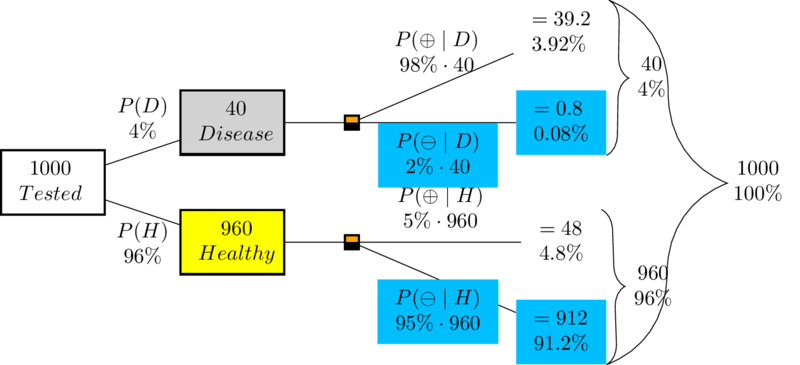

In [13]:
%%tikz -s 800,600 -sc 1  -f png

\usetikzlibrary{positioning,decorations.pathreplacing}

\definecolor{c3000}{RGB}{255,165,0}
\definecolor{c5000}{RGB}{255,255,0}
\definecolor{c2000}{RGB}{1,190,255}
\definecolor{c0040}{RGB}{211,211,211} %'lightgrey') # 211,211,211 #d3d3d3

\node [rectangle,draw=black,line width=1pt,text width=1.5cm]
{$\begin{array}{c} 1000\\ Tested\end{array}$}
[grow=right, level distance =30mm, sibling distance = 20mm]
child {node [fill={c5000},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 960\\ Healthy\end{array}$}
       [ level distance =10mm,sibling distance = 15mm]
       {child {child {node [rectangle,fill={c3000},draw=black,line width=1pt]
                      {}
                      [level distance =35mm,sibling distance = 15mm]
                      child {node [fill={c2000}](TrueN)
                             {$\begin{array}{l}= 912\\91.2\%\end{array}$}
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][below]
                             {$\begin{array}{c}P(\ominus \mid H)\\95\% \cdot 960\end{array}$}}
                      child {node (FalseP)
                             {$\begin{array}{l}= 48\\4.8\%\end{array}$}
                             edge from parent node[above]
                             {$\begin{array}{c}P(\oplus \mid H)\\5\% \cdot 960\end{array}$}}
                      child {edge from parent[draw = none]}
                      }
               }
        }
       edge from parent node[below]{$\begin{array}{c}P(H)\\96\%\end{array}$}
       }
child {node [rectangle,fill={c0040},draw=black,line width=1pt,text width=1.5cm]
       {$\begin{array}{c} 40\\ Disease\end{array}$}
       [level distance =10mm,sibling distance = 15mm]
       {child {child {node [rectangle,fill={c3000},draw=black,line width=1pt]
                      {}
                      [level distance =35mm,sibling distance = 15mm]
                      child {edge from parent[draw = none]}
                      child {node [fill={c2000}](FalseN)
                             {$\begin{array}{l}= 0.8\\0.08\%\end{array}$}
                             edge from parent node[fill={rgb,255:red,1;green,190;blue,255}][below]
                             {$\begin{array}{c}P(\ominus \mid D)\\2\% \cdot 40\end{array}$}}
                      child {node (TrueP)
                             {$\begin{array}{l}= 39.2\\3.92\%\end{array}$}
                             edge from parent node[above]
                             {$\begin{array}{c}P(\oplus \mid D)\\98\% \cdot 40\end{array}$}}
                      }
              }
       }
       edge from parent node[above]{$\begin{array}{c}P(D)\\4\%\end{array}$}
      }
;
\draw[decorate,decoration={brace,mirror,amplitude=10pt}] (FalseN.south east) -- (TrueP.north east)
node [midway,xshift=0.2cm,right] 
{$\begin{array}{c}40\\4\%\end{array}$};
\draw[decorate,decoration={brace,mirror,amplitude=10pt}] (TrueN.south east) -- (FalseP.north east)
node [midway,xshift=0.2cm,right] 
{$\begin{array}{c}960\\96\%\end{array}$};
\draw[decorate,decoration={brace,mirror,amplitude=2cm, meta-amplitude=1.5cm}] (TrueN.south east) --  (TrueP.north east)
node [midway,xshift=1.8cm,right] 
{$\begin{array}{c}1000\\100\%\end{array}$};

### [Prob & Stats - Bayes Theorem (8 of 24) What Happens if the Disease is Rare?](https://youtu.be/yzTP-gKXoiI)

**После** тестирования **1000** больных получили такой результат при качестве тестов:

* $\color{red}{1\%}$ ~~**4%**~~ являются больными 
* $\color{red}{10}$ ~~**40**~~ тестированы как **больные**
* $\color{red}{990}$ ~~**960**~~ оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

In [14]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;

P_disease = 0.04; P_helthy = 0.96
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

P_disease = 0.01; P_helthy = 0.99 
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

0.4495412844036697
0.16526138279932545


Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при **положительном** тестировании:

$
\begin{array}{ccc}
P(D \mid +)  &= \dfrac{(98\%)\ (4\%)}{(98\%)(4\%) +(5\%)(96\%)} &= 44.95\% \\
\color{red}{P(D \mid +)} &= \dfrac{(98\%)\ \color{red}{(1\%)}}
{(98\%)\color{red}{(1\%)} + (5\%)\color{red}{(99\%)}} &= \color{red}{16.53\%}\\
\end{array}
$

### [Prob & Stats - Bayes Theorem (9 of 24) What Happens if the Disease is Very Rare?](https://youtu.be/O8TzqxFDsyw)

**После** тестирования **1000** людей получили такой результат при качестве тестов:

* $\color{red}{0.1\%}$ ~~**1%**~~  ~~**4%**~~ являются больными 
* $\color{red}{1}$ ~~**10**~~ ~~**40**~~ тестированы как **больные**
* $\color{red}{999}$ ~~**990**~~ ~~**960**~~ оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

In [15]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;

P_disease = 0.04; P_helthy = 0.96
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

P_disease = 0.01; P_helthy = 0.99 
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

P_disease = 0.001; P_helthy = 0.999 
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

0.4495412844036697
0.16526138279932545
0.01924209699587669


Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при **положительном** тестировании:

$
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (4\%)}{(98\%)(4\%) +(5\%)(96\%)} &= 44.95\%   \\
P(D \mid +)  =& \dfrac{(98\%)\ (1\%)}{(98\%) (1\%) + (5\%)(99\%)} &= 16.53\% \\
\color{red}{P(D \mid +)} =& \dfrac{(98\%)\ \color{red}{(0.1\%)}}
{(98\%)\color{red}{(0.1\%)} + (5\%)\color{red}{(99.9\%)}} &= \color{red}{1.92\%}\\
\end{array}
$

### [Prob & Stats - Bayes Theorem (10 of 24) What Happens if the Disease is Very, Very Rare?](https://youtu.be/K3-IzBXB_0w)

**После** тестирования **1000** больных получили такой результат при качестве тестов:

* $\color{red}{0.1\%}$ ~~**1%**~~  ~~**4%**~~ являются больными 
* $\color{red}{1}$ ~~**10**~~ ~~**40**~~ тестированы как **больные**
* $\color{red}{999}$ ~~**990**~~ ~~**960**~~ оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test $\color{red}{99\%}$ ~~**95%**~~ == **SPECIFIC == TRUE Negative**, $\color{red}{1\%}$ **~~5%~~ == FALSE Positive**



In [16]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;

P_disease = 0.04; P_helthy = 0.96
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

P_disease = 0.01; P_helthy = 0.99 
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

P_disease = 0.001; P_helthy = 0.999 
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

TP = 0.98; FN = 0.02; TN = 0.99; FP = 0.01;
print(TP*P_disease/(P_disease*TP + P_helthy*FP))

0.4495412844036697
0.16526138279932545
0.01924209699587669
0.08933454876937101


Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при **положительном** тестировании:

$
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (4\%)}  {(98\%)(4\%) +(5\%)(96\%)} &= 44.95\%    \\
P(D \mid +)  =& \dfrac{(98\%)\ (1\%)}  {(98\%)(1\%) + (5\%)(99\%)} &= 16.53\%   \\
P(D \mid +)  =& \dfrac{(98\%)\ (0.1\%)}{(98\%)(0.1\%) + (5\%)(99.9\%)} &= 1.92\% \\
\color{red}{P(D \mid +)} =& \dfrac{(98\%)\ \color{red}{(0.1\%)}}
{(98\%)\color{red}{(0.1\%)} + \color{red}{(1\%)}\color{red}{(99.9\%)}} &= \color{red}{8.93\%}\\
\end{array}
$

### [Prob & Stats - Bayes Theorem (11 of 24) What Happens if Disease is Very, Very Rare & Better Testing?](https://youtu.be/nbJi3vNa6fA)

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                       & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus  & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5}\\  
\boldsymbol{+}         & 98\%   = 0.98                     & 1\%  = 9.99                       & 10.97    \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    & \boxed{6}\\ 
\boldsymbol{-}         & 2\%  = 0.02                       & 99\% = 989.01                     & 989.03   \\ \hline
                       &  1                                &   999                             & 1000 \\ \hline
\end{array}
$

$
\boxed{
\begin{array}{ccc}
P(D \mid +) =  \dfrac{\boxed{1}}{\boxed{1} + \boxed{2}} &= \dfrac{\boxed{1}}{\boxed{5}} &= \dfrac{0.98}{10.97} &= 0.08933 \quad(8.93\%)
\end{array}
}
$

### [Prob & Stats - Bayes Theorem (12 of 24) What if We Run the Test Again?](https://youtu.be/ncaCq6FIsTg)

Тестирование **1000** человек на наличие болезни происходит в следущих условиях:

* **1%** являются больными
* **10** являются **больными**
* **990** **здоровы**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                      & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5}\\  
\boldsymbol{+}         & 98\%   = 9.8                     & 5\%  = 49.5                       & 59.3   \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    & \boxed{6}\\ 
\boldsymbol{-}         & 2\%  = 0.2                       & 95\% = 940.5                      & 940.7   \\ \hline
                       & 10                               & 990                               & 1000 \\ \hline
\end{array}
$

In [17]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;
P_disease = 0.01; P_helthy = 0.99 

P_disease = 0.01; P_helthy = 0.99 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:3.1f}) + #2({1:5.1f}) == #5({2:5.1f})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:3.1f}) + #4({1:5.1f}) == #6({2:5.1f})".format(Test3_FN, Test4_TN, Test6_N))

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

#1(9.8) + #2( 49.5) == #5( 59.3)
#3(0.2) + #4(940.5) == #6(940.7)
P(D|+)=0.1652613827993255  P(H|+)=0.8347386172006745 
P(D|+)=0.7950989320307973  P(H|+)=0.2049010679692027 


Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при 

$\color{red}{Первом}$ ***положительном*** тестировании:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (1\%)}  {(98\%)(1\%) + (5\%)(99\%)} &= \color{red}{16.53}\% \\
\end{array}
}
\quad
\boxed{
P(H \mid +) = 83.47\%
}
$

$\color{red}{Втором}$ ***положительном*** тестировании:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ \color{red}{(16.53\%)}}  {(98\%)\color{red}{(16.53\%)} + (5\%)\color{red}{(83.47\%)}} &= 
\color{blue}{79.50989\%}  \\
\end{array}
}
\quad
\boxed{P(H \mid +) = 20.49\%}
$

### [Prob & Stats - Bayes Theorem (13 of 24) What if We Run the Test Again and Again?](https://youtu.be/n_TvlbA--y8)

Тестирование **1000** человек на наличие болезни происходит в следущих условиях:

* **1%** являются больными
* **10** являются **больными**
* **990** **здоровы**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

In [18]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;
P_disease = 0.01; P_helthy = 0.99 

P_disease = 0.01; P_helthy = 0.99 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:3.1f}) + #2({1:5.1f}) == #5({2:5.1f})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:3.1f}) + #4({1:5.1f}) == #6({2:5.1f})".format(Test3_FN, Test4_TN, Test6_N))

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D|+)={0:.16f}  P(H|+)={1:.16f} ".format(P_disease,P_helthy))

#1(9.8) + #2( 49.5) == #5( 59.3)
#3(0.2) + #4(940.5) == #6(940.7)
P(D|+)=0.1652613827993255  P(H|+)=0.8347386172006745 
P(D|+)=0.7950989320307973  P(H|+)=0.2049010679692027 
P(D|+)=0.9870224116396645  P(H|+)=0.0129775883603355 


$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                       & \bf Disease                      & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive}   & \boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5}\\  
\boldsymbol{+}         & 98\%   = 9.8                     & 5\%  = 49.5                       & 59.3   \\  \hline
\text{Test Negative}   & \boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    & \boxed{6}\\ 
\boldsymbol{-}         & 2\%  = 0.2                       & 95\% = 940.5                      & 940.7   \\ \hline
                       & 10                               & 990                               & 1000 \\ \hline
\end{array}
$

Вероятность того что больной является  $\color{red}{по\ Настоящему\ больным}$  при 

$\color{red}{Первом}$ ***положительном*** тестировании:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (1\%)}  {(98\%)(1\%) + (5\%)(99\%)} &= \color{red}{16.53}\% \\
\end{array}
}
\quad
\boxed{
P(H \mid +) = 83.47\%
}
$

$\color{blue}{Втором}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ (\color{red}{16.53\%})}  {(98\%)(\color{red}{16.53\%}) + (5\%)(\color{red}{83.47\%})} &= \color{blue}{79.50989\%}  \\
\end{array}
}
\quad
\boxed{P(H \mid +) = 20.49\%}
$

$\color{magenta}{Третьем}$ ***положительном*** тестированиии:

$
\boxed{
\begin{array}{ccr}
P(D \mid +)  =& \dfrac{(98\%)\ \color{blue}{(79.51\%)}}  {(98\%)\color{blue}{(79.51\%)} + (5\%)\color{blue}{(20.49\%)}} &= 
\color{magenta}{98.70224\%}  \\
\end{array}
}
\quad
\boxed{P(H \mid +) = 1.2977\%}
$

Основной целью диагностического теста является постановка диагноза, поэтому мы должны знать вероятность того, что тест позволяет ставить правильный диагноз. Чувствительность и специфичность не дают нам подобной информации. Вместо этого необходимо анализировать результаты теста, используя прогностические значения.

### [Prob & Stats - Bayes Theorem (14 of 24) What is Positive Predictive Value (PPV)?](https://youtu.be/JX4Je4bO4Zw)

**Положительное прогностическое значение** - доля пациентов с положительными результатами теста, которые были правильно диагностированы.

### [Положительные и отрицательные прогностические значения](https://sites.google.com/site/konstbel/knigi/zametki-po-medicinskoj-statistike/diagnosticeskie-testy-2-prognosticeskie-znacenia)

Положительные и отрицательные прогностические значения (**PPV** и **NPV** соответственно) являются пропорциями положительных и отрицательных результатов статистических и диагностических тестов, которыми являются истинно положительные и истинно отрицательные результаты, соответственно. **PPV** и **NPV** описывают характеристики диагностического теста или другой статистической мерой. Высокий результат можно интерпретировать как указание на точность такой статистики. **PPV** может быть получен с помощью теоремы Байеса .

В поиске информации , **PPV** часто называют **точностью**.

$
\begin{array}{ccr}
PPV  =& \dfrac{\text{the number of TRUE POSITIVES}} {\text{the TOTAL number of POSITIVES}}\\
\\
PPV  =& \dfrac{\text{number of TRUE POSITIVES}} {\text{number of TRUE POSITIVES} + \text{number of FALSE POSITIVES}}
\end{array}
$

$
PPV  = \dfrac{\text{TRUE POSITIVES} \bigoplus } {\text{TOTAL POSITIVES} \bigoplus } = \dfrac{P(+ \mid D)\ P(D)}{P(+)} =
\dfrac{P(+ \mid D)\ P(D)}{P(+ \mid D)P(D) + P(+ \mid H)P(H)} = P(D \mid +)
$

**Положительное прогностическое значение** $\boxed{PPV  = P(D \mid +)}$ Вероятность того что объект является Правильно диагностирован при его положительном результате тестирования.

### [Prob & Stats - Bayes Theorem (15 of 24) What is Negative Predictive Value (NPV)?](https://youtu.be/QFScbw9WKpM)

**Отрицательное прогностическое значение** - доля пациентов с отрицательными результатами теста, которые были правильно диагностированы.

### [Положительные и отрицательные прогностические значения](https://sites.google.com/site/konstbel/knigi/zametki-po-medicinskoj-statistike/diagnosticeskie-testy-2-prognosticeskie-znacenia)

$
\begin{array}{ccr}
NPV  =& \dfrac{\text{the number of TRUE NEGATIVES}} {\text{the TOTAL number of NEGATIVES}}\\
\\
NPV  =& \dfrac{\text{number of TRUE NEGATIVES}} {\text{number of TRUE NEGATIVES} + \text{number of FALSE NEGATIVES}}
\end{array}
$

$
NPV  = \dfrac{\text{TRUE NEGATIVES} \ominus } {\text{TOTAL NEGATIVES} \ominus } = \dfrac{P(- \mid H)\ P(H)}{P(-)} =
\dfrac{P(- \mid H)\ P(H)}{\underbrace{P(- \mid H)P(H)}_{\text{TRUE NEGATIVES}} + \underbrace{P(- \mid D)P(D)}_{\text{FALSE NEGATIVE}}} = P(H \mid -)
$

**Отрицательное прогностическое значение** $\boxed{NPV  = P(H \mid -)}$ Вероятность того что объект является Правильно диагностирован при его отрицательном результате тестирования.

### [Prob & Stats - Bayes Theorem (16 of 24) PPV & NPV Numerical Examples](https://youtu.be/2WcSd7FfUFI)


**После** тестирования больных получили такой результат при качестве тестов:

* **4%** являются больными
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                     & \bf Disease                      & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive} & \boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5} \text{ TOTAL }\bigoplus\\  
\boldsymbol{+}       & 98\%   = 39.2                    & 5\%  = 48                         &  87.2    \\  \hline
\text{Test Negative} & \boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    & \boxed{6} \text{ TOTAL }\ominus\\ 
\boldsymbol{-}       & 2\%  = 0.8                       & 95\% =  912                       & 912.8    \\ \hline
                     &  40                              &   960                             & 1000 \\ \hline
\end{array}
$

In [19]:
N = 1000
TP = 0.98; FN = 0.02; TN = 0.95; FP = 0.05;

P_disease = 0.04; P_helthy = 0.96 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0}) + #2({1}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0}) + #4({1}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))

PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print(P_disease)
print(P_helthy)
print("Sensetivity =",Test1_TP/N_P_disease)
print("Specifity =",  Test4_TN/N_P_helthy)

#1(39.2) + #2(48.0) == #5(87.2)
#3(0.8) + #4(912.0) == #6(912.8)
PPV = 0.44954128440366975 
NPV = 0.9991235758106924
0.4495412844036697
0.5504587155963303
Sensetivity = 0.9800000000000001
Specifity = 0.95


$
\begin{array}{ccr}
PPV =& \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{39.2}{87.2}  &= 44.954\% \\
\\
NPV =& \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &=  \dfrac{912}{912.8} &= 99.912\% \\
\end{array}
$

### [Prob & Stats - Bayes Theorem (17 of 24) Prevalence, Sensitivity, Specificity, PPV, NPV](https://youtu.be/87coLIgU_us)


* **4%** являются больными
* **40** тестированы как **больные**
* **960** оставлены **здоровыми**


* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **95%** == **SPECIFIC == TRUE Negative**, **5% == FALSE Positive**

$
\begin{array}{clll}
\hphantom{\text{TEST}}& \hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\bf TEST
\end{matrix}
\begin{array}{|c|c|c|c|}
\hline
                     & \bf Disease                      & \bf Healthy    & \bf Total\\ \hline
\text{Test Posivive} & \boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus & \boxed{5} \text{ TOTAL }\bigoplus\\  
\boldsymbol{+}       & 98\%   = 39.2                    & 5\%  = 48                         &  87.2    \\  \hline
\text{Test Negative} & \boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    & \boxed{6} \text{ TOTAL }\ominus\\ 
\boldsymbol{-}       & 2\%  = 0.8                       & 95\% =  912                       & 912.8    \\ \hline
                     &  40                              &   960                             & 1000 \\ \hline
\end{array}
$

$
\begin{array}{lll}
P(D \mid +) =  PPV &= \dfrac{P(+ \mid D)\ P(D)}{P(+)} =
\dfrac{\overbrace{P(+ \mid D)\ P(D)}^{\text{tested + TRUE POSITIVE}} } {\underbrace{P(+ \mid D)P(D) + P(+ \mid H)P(H)}_{\text{All tested +/POSITIVE}}}\\
 &= \dfrac{(98\%)\ (4\%)}  {(98\%)(4\%) +(5\%)(96\%)} = \dfrac{39.2} {39.2 + 48} = \dfrac{39.2}{87.2} = 44.95\% 
\end{array}
$

$
Распространенность \ заболевания = \dfrac{TOTAL\ больных}{TOTAL \ людей} = \dfrac{40}{1000} = 4\%
$

$
\begin{array}{llll}
SENSITIVITY &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TRUE }\bigoplus + \text{ FALSE }\ominus}
&= \dfrac{\text{ TRUE }\bigoplus} {\text{TOTAL D}}
&= \dfrac{39.2}{40}
&= 98\% \\
\\
SPECIFITY &= \dfrac{\text{ TRUE }\ominus} {\text{ TRUE }\ominus + \text{ FALSE }\bigoplus}
&= \dfrac{\text{ TRUE }\ominus} {\text{TOTAL H}}
&= \dfrac{912}{960}
&= 95\% \\
\end{array}
$

### [Prob & Stats - Bayes Theorem (18 of 24) Simple Form of the Definitions](https://youtu.be/DoJzXmZpDP0)

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{39.2}{87.2}  &= 44.954\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &=  \dfrac{912}{912.8} &= 99.912\% \\
\end{array}
$

### [Prob & Stats - Bayes Theorem (19 of 24) Determining Sensitivity and Specificity](https://youtu.be/FqTG-Eg5t9s)

$
\begin{array}{clll}
\hphantom{\text{Test Posivive +}} &  & \bf TRUTH & \hphantom{\text{0.0}} \\
\end{array}
\\
\begin{matrix}
\begin{matrix}
\bf TEST
\end{matrix}
\begin{matrix}
\begin{array}{|c|c|}
\hline
\bf Disease                      & \bf Healthy                       \\  \hline
\boxed{1} \text{ TRUE }\bigoplus & \boxed{2} \text{ FALSE }\bigoplus \\  
19                               & 5                                 \\  \hline
\boxed{3} \text{ FALSE }\ominus  & \boxed{4} \text{ TRUE }\ominus    \\ 
1                                & 75                                \\ \hline
\end{array}
\\
\begin{array}{ll}
20 \hphantom{AAAA} & \hphantom{\text{AA}} 80 \\ 
\end{array}
\end{matrix}
\begin{matrix}
\vphantom{\bf TEST}\\\
\end{matrix}
\begin{array}{rr}
\vphantom{\bf Healthy} \\
\vphantom{\boxed{2} \text{ FALSE }\bigoplus} \\  
= 24\\
\vphantom{\boxed{4} \text{ TRUE }\ominus} \\ 
= 76\\ \hline
100\\
\end{array}
\end{matrix}
$


$
\begin{array}{llll}
SENSITIVITY 
&= \dfrac{\text{ TRUE }\bigoplus} {\text{TOTAL D}}
&= \dfrac{\text{ TRUE }\bigoplus}{\text{ TRUE }\bigoplus + \text{ FALSE }\ominus}
&= \dfrac{19}{20}
&= 95\% \\
\\
SPECIFITY 
&= \dfrac{\text{ TRUE }\ominus} {\text{TOTAL H}}
&= \dfrac{\text{ TRUE }\ominus} {\text{ TRUE }\ominus + \text{ FALSE }\bigoplus}
&= \dfrac{75}{80}
&= 93.75\% \\
\end{array}
$

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{19}{24}  &= 79.17\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &=  \dfrac{75}{76} &= 98.68\% \\
\end{array}
$

In [20]:
N = 100; P_disease = 0.2; P_helthy = 0.8 

Test1_TP = 20; Test2_FP = 0;
Test3_FN = 0;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 19; Test2_FP = 0;
Test3_FN = 1;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 18; Test2_FP = 0;
Test3_FN = 2;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 17; Test2_FP = 0;
Test3_FN = 3;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 16; Test2_FP = 0;
Test3_FN = 4;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 15; Test2_FP = 0;
Test3_FN = 5;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 14; Test2_FP = 0;
Test3_FN = 6;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 13; Test2_FP = 0;
Test3_FN = 7;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

#1(20) + #2( 0) == #5(20)
#3( 0) + #4(80) == #6(80)
PPV = 1.0 
NPV = 1.0
Sensetivity = 20/20 == 1.0
Specifity = 80/80 == 1.0
--------------------------
#1(19) + #2( 0) == #5(19)
#3( 1) + #4(80) == #6(81)
PPV = 1.0 
NPV = 0.9876543209876543
Sensetivity = 19/20 == 0.95
Specifity = 80/80 == 1.0
--------------------------
#1(18) + #2( 0) == #5(18)
#3( 2) + #4(80) == #6(82)
PPV = 1.0 
NPV = 0.975609756097561
Sensetivity = 18/20 == 0.9
Specifity = 80/80 == 1.0
--------------------------
#1(17) + #2( 0) == #5(17)
#3( 3) + #4(80) == #6(83)
PPV = 1.0 
NPV = 0.963855421686747
Sensetivity = 17/20 == 0.85
Specifity = 80/80 == 1.0
--------------------------
#1(16) + #2( 0) == #5(16)
#3( 4) + #4(80) == #6(84)
PPV = 1.0 
NPV = 0.9523809523809523
Sensetivity = 16/20 == 0.8
Specifity = 80/80 == 1.0
--------------------------
#1(15) + #2( 0) == #5(15)
#3( 5) + #4(80) == #6(85)
PPV = 1.0 
NPV = 0.9411764705882353
Sensetivity = 15/20 == 0.75
Specifity = 80/80 == 1.0
--------------------------
#1(14) + #2(

### [Prob & Stats - Bayes Theorem (20 of 24) Effects of the Test Results: Example 1](https://youtu.be/9E2mWYBbsuE)


$
\begin{array}{ccccc} % Main
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
20                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
0                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
19                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
1                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
18                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
2                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
17                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
3                            & 80                          \\ \hline
\end{array}
\\
\text{Sensitivity} 
& \dfrac{20}{20}=100\% 
& \dfrac{19}{20}=95\% 
& \dfrac{18}{20}=90\% 
& \dfrac{17}{20}=85\%
\\
\text{Specifity} & \mid & \mid  & \mid  & \mid \\
PPV & \mid  & \mid  & \mid  & \mid \\
NPV & \mid
& \dfrac{80}{81}=98.76\% 
& \dfrac{80}{82}=97.56\% 
& \dfrac{80}{83}=96.38\%
\\
\end{array}
$

$
\begin{array}{ccccc} % Main
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
16                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
4                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
15                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
5                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
14                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
6                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
13                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
7                            & 80                          \\ \hline
\end{array}
\\
\text{Sensitivity} 
& \dfrac{16}{20}=80\% 
& \dfrac{15}{20}=75\% 
& \dfrac{14}{20}=70\% 
& \dfrac{13}{20}=65\%
\\
\text{Specifity} & \mid & \mid  & \mid  & \mid \\
PPV & \mid  & \mid  & \mid  & \mid \\
NPV 
& \dfrac{80}{84}=95.24\% 
& \dfrac{80}{85}=94.12\% 
& \dfrac{80}{86}=93.02\% 
& \dfrac{80}{87}=91.95\%
\\
\end{array}
$

In [21]:
N = 100; P_disease = 0.2; P_helthy = 0.8 

Test1_TP = 20; Test2_FP = 0;
Test3_FN = 0;  Test4_TN = 80;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 19; Test2_FP = 5;
Test3_FN = 1;  Test4_TN = 75;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 18; Test2_FP = 10;
Test3_FN = 2;  Test4_TN = 70;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 17; Test2_FP = 15;
Test3_FN = 3;  Test4_TN = 65;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 16; Test2_FP = 20;
Test3_FN = 4;  Test4_TN = 60;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 15; Test2_FP = 25;
Test3_FN = 5;  Test4_TN = 55;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 14; Test2_FP = 30;
Test3_FN = 6;  Test4_TN = 50;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

print("-------------"*2)
Test1_TP = 13; Test2_FP = 35;
Test3_FN = 7;  Test4_TN = 45;
N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1({0:2}) + #2({1:2}) == #5({2})".format(Test1_TP, Test2_FP, Test5_P))
print("#3({0:2}) + #4({1:2}) == #6({2})".format(Test3_FN, Test4_TN, Test6_N))
PPV = Test1_TP/Test5_P; NPV = Test4_TN/Test6_N;
print("PPV =", PPV, "\nNPV =",NPV)
print("Sensetivity = {0}/{1:.0f} == {2}".format(Test1_TP,N_P_disease,Test1_TP/N_P_disease))
print("Specifity = {0}/{1:.0f} == {2}".format(Test4_TN,N_P_helthy,Test4_TN/N_P_helthy))

#1(20) + #2( 0) == #5(20)
#3( 0) + #4(80) == #6(80)
PPV = 1.0 
NPV = 1.0
Sensetivity = 20/20 == 1.0
Specifity = 80/80 == 1.0
--------------------------
#1(19) + #2( 5) == #5(24)
#3( 1) + #4(75) == #6(76)
PPV = 0.7916666666666666 
NPV = 0.9868421052631579
Sensetivity = 19/20 == 0.95
Specifity = 75/80 == 0.9375
--------------------------
#1(18) + #2(10) == #5(28)
#3( 2) + #4(70) == #6(72)
PPV = 0.6428571428571429 
NPV = 0.9722222222222222
Sensetivity = 18/20 == 0.9
Specifity = 70/80 == 0.875
--------------------------
#1(17) + #2(15) == #5(32)
#3( 3) + #4(65) == #6(68)
PPV = 0.53125 
NPV = 0.9558823529411765
Sensetivity = 17/20 == 0.85
Specifity = 65/80 == 0.8125
--------------------------
#1(16) + #2(20) == #5(36)
#3( 4) + #4(60) == #6(64)
PPV = 0.4444444444444444 
NPV = 0.9375
Sensetivity = 16/20 == 0.8
Specifity = 60/80 == 0.75
--------------------------
#1(15) + #2(25) == #5(40)
#3( 5) + #4(55) == #6(60)
PPV = 0.375 
NPV = 0.9166666666666666
Sensetivity = 15/20 == 0.75
Specifity = 55

### [Prob & Stats - Bayes Theorem (21 of 24) Effects of the Test Results: Example 2](https://youtu.be/rMIL4d64RUg)

$
\begin{array}{ccccc} % Main
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
20                           & 0                           \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
0                            & 80                          \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
19                           & \color{red}{5}              \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
1                            & \color{red}{75}             \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
18                           & \color{red}{10}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
2                            & \color{red}{70}             \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
17                           & \color{red}{15}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
3                            & \color{red}{65}             \\ \hline
\end{array}
\\
\text{Sensitivity} & \dfrac{20}{20}=100\% 
& \dfrac{19}{20}=95\% 
& \dfrac{18}{20}=90\% 
& \dfrac{17}{20}=85\%
\\
\text{Specifity} 
& 1 
& \dfrac{75}{80}=93.75\%  
& \dfrac{70}{80}=87.5\%  
& \dfrac{65}{80}=81.25\% \\
PPV 
& 1 
& \dfrac{19}{24}=79.16\%
& \dfrac{18}{28}=64.29\%
& \dfrac{17}{32}=53.13\% \\
NPV 
& 1
& \dfrac{80}{81}=98.68\% 
& \dfrac{80}{82}=97.22\% 
& \dfrac{80}{83}=95.59\%
\\
\end{array}
$

$
\begin{array}{ccccc} % Main
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
16                           & \color{red}{20}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
4                            & \color{red}{60}             \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
15                           & \color{red}{25}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
5                            & \color{red}{55}             \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
14                           & \color{red}{30}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
6                            & \color{red}{50}             \\ \hline
\end{array}
&
\begin{array}{|c|c|}
\hline
\bf D                        & \bf H                       \\  \hline
\tiny{\text{ TRUE }\oplus}   &\tiny{\text{ FALSE }\oplus}  \\  
13                           & \color{red}{35}             \\  \hline
\tiny{\text{ FALSE }\ominus} & \tiny{\text{ TRUE }\ominus} \\ 
7                            & \color{red}{45}             \\ \hline
\end{array}
\\
\text{Sensitivity} 
& \dfrac{16}{20}=80\% 
& \dfrac{15}{20}=75\% 
& \dfrac{14}{20}=70\% 
& \dfrac{13}{20}=65\%
\\
\text{Specifity} 
& \dfrac{60}{80} = 75\%
& \dfrac{55}{80} = 68.75\%
& \dfrac{50}{80} = 62.5\%
& \dfrac{45}{80} = 56.25\% \\
PPV 
& \dfrac{16}{36} = 44.44\%
& \dfrac{15}{40} = 37.5\%
& \dfrac{14}{44} = 31.82\%
& \dfrac{13}{48} = 27.08\% \\
NPV 
& \dfrac{80}{84}=93.75\% 
& \dfrac{80}{85}=91.67\% 
& \dfrac{80}{86}=89.28\% 
& \dfrac{80}{87}=86.54\%
\\
\end{array}
$

In [22]:
N = 100000; 
P_disease = 0.05; P_helthy = 0.95

TP = 0.98; FN = 1-TP; TN = 0.96; FP = 1-TN;
print("TRUE+ [{0:4.2f}]  FALSE+[{1:4.2f}]".format(TP,FP))
print("FALSE-[{0:4.2f}]  TRUE- [{1:4.2f}]".format(FN,TN))

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity =",Test1_TP/N_P_disease)
print("Specifity =",  Test4_TN/N_P_helthy)

PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

TRUE+ [0.98]  FALSE+[0.04]
FALSE-[0.02]  TRUE- [0.96]
Disease[5000] + Helthy[95000]  == 100000
#1[ 4900] + #2[ 3800] == #5[ 8700]
#3[  100] + #4[91200] == #6[91300]
Sensetivity = 0.98
Specifity = 0.96
PPV = 0.5632183908045975 
NPV = 0.9989047097480832
P(D)=0.5632183908045975
P(H)=0.43678160919540254


### [Prob & Stats - Bayes Theorem (22 of 24) Example of Table Format: Step 1](https://youtu.be/sNRsq__oI0Y)

Всего в первый раз **100000** тестируемых при качестве тестов:
* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **96%** == **SPECIFIC == TRUE Negative**, **4% == FALSE Positive**


* **5%** распространённость болезни **Prevalence** тогда:
* **5000 = D** являются **больными** 
* **95000 = H** являются **здоровыми**

$
\begin{array}{|c|c|c|c|}
\hline
          & \bf Disease                     & \bf Healthy    & \bf Total\\ \hline
\bigoplus & \boxed{1} \text{ TRUE }\bigoplus& \boxed{2} \text{ FALSE }\bigoplus & \boxed{5} \text{ TOTAL }\bigoplus\\  
\boldsymbol{+}       & 98\%   = 4900        & 4\%  = 3800     & 8700 \\  \hline
\ominus & \boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    & \boxed{6} \text{ TOTAL }\ominus\\ 
\boldsymbol{-}       & 2\%  = 100           & 96\% =  91200   & 91300 \\ \hline
                     & 5000                 &  95000                            & 100000 \\ \hline
\end{array}
$

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4900}{8700}  &= 56.32\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{91200}{91300} &= 99.89\% \\
\end{array}
$

In [23]:
N = 100000; 
P_disease = 0.05; P_helthy = 0.95

TP = 0.98; FN = 1-TP; TN = 0.96; FP = 1-TN;
print("TRUE+ [{0:4.2f}]  FALSE+[{1:4.2f}]".format(TP,FP))
print("FALSE-[{0:4.2f}]  TRUE- [{1:4.2f}]".format(FN,TN))

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity ={0}  \nSpecifity ={1}".format(Test1_TP/N_P_disease,Test4_TN/N_P_helthy))

PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

print("----------------------"*2)
N = Test5_P; 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2:.0f}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity ={0}  \nSpecifity ={1}".format(Test1_TP/N_P_disease,Test4_TN/N_P_helthy))
PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

TRUE+ [0.98]  FALSE+[0.04]
FALSE-[0.02]  TRUE- [0.96]
Disease[5000] + Helthy[95000]  == 100000
#1[ 4900] + #2[ 3800] == #5[ 8700]
#3[  100] + #4[91200] == #6[91300]
Sensetivity =0.98  
Specifity =0.96
PPV = 0.5632183908045975 
NPV = 0.9989047097480832
P(D)=0.5632183908045975
P(H)=0.43678160919540254
--------------------------------------------
Disease[4900] + Helthy[3800]  == 8700
#1[ 4802] + #2[  152] == #5[ 4954]
#3[   98] + #4[ 3648] == #6[ 3746]
Sensetivity =0.98  
Specifity =0.96
PPV = 0.9693177230520791 
NPV = 0.9738387613454351
P(D)=0.9693177230520791
P(H)=0.030682276947920917


### [Prob & Stats - Bayes Theorem (23 of 24) Example of Table Format: Step 2](https://youtu.be/Ohaw8PG0NpQ)

Тест $\color{red}{\text{2 раза}}$

Всего в первый раз **100000** тестируемых при качестве тестов:
* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **96%** == **SPECIFIC == TRUE Negative**, **4% == FALSE Positive**


* **5%** распространённость болезни **Prevalence** тогда:
* **5000 = D** являются **больными** 
* **95000 = H** являются **здоровыми**

$
\begin{array}{|c|c|c|c|}
\hline
          & \bf Disease                     & \bf Healthy    & \bf Total\\ \hline
\bigoplus & \boxed{1} \text{ TRUE }\bigoplus& \boxed{2} \text{ FALSE }\bigoplus & \\  
\boldsymbol{+}       & 98\%   = \color{red}{4900}        & 4\%  = \color{red}{3800}     & \color{red}{8700} \\  \hline
\ominus & \boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    & \\ 
\boldsymbol{-}       & 2\%  = 100           & 96\% =  91200   & 91300 \\ \hline
                     & 5000                 &  95000                             & 100000 \\ \hline
\end{array}
\begin{array}{|c|c|c|c|}
\hline
\bf Disease                     & \bf Healthy    & \bf Total\\ \hline
\boxed{1} \text{ TRUE }\bigoplus& \boxed{2} \text{ FALSE }\bigoplus & \\  
98\%   = 4802        & 4\%  = 152     & 4954 \\  \hline
\boxed{3} \text{ FALSE }\ominus   & \boxed{4} \text{ TRUE }\ominus    & \\ 
2\%  = 98            & 96\% =  3648   & 3746 \\ \hline
\color{red}{4900}    &  \color{red}{3800}   & \color{red}{8700} \\ \hline
\end{array}
$

Первый тест:

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4900}{8700}  &= 56.32\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{91200}{91300} &= 99.89\% \\
\end{array}
$

$\color{red}{Повторое}$ тестирование тех у кого тест дал $\bigoplus$:

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4802}{4954}  &= \color{red}{96.93}\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{3648}{3746} &= 97.38\% \\
\end{array}
$

In [24]:
N = 100000; 
P_disease = 0.05; P_helthy = 0.95

TP = 0.98; FN = 1-TP; TN = 0.96; FP = 1-TN;
print("TRUE+ [{0:4.2f}]  FALSE+[{1:4.2f}]".format(TP,FP))
print("FALSE-[{0:4.2f}]  TRUE- [{1:4.2f}]".format(FN,TN))

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity ={0}  \nSpecifity ={1}".format(Test1_TP/N_P_disease,Test4_TN/N_P_helthy))

PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

print("----------------------"*2)
N = Test5_P; 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2:.0f}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity ={0}  \nSpecifity ={1}".format(Test1_TP/N_P_disease,Test4_TN/N_P_helthy))
PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

print("----------------------"*2)
N = Test5_P; 

N_P_disease = N * P_disease
N_P_helthy  = N * P_helthy
print("Disease[{0:.0f}] + Helthy[{1:.0f}]  == {2:.0f}".format(N_P_disease,N_P_helthy,N))

Test1_TP = N_P_disease * TP
Test2_FP = N_P_helthy  * FP
Test3_FN = N_P_disease * FN
Test4_TN = N_P_helthy  * TN
Test5_P = Test1_TP + Test2_FP
Test6_N = Test3_FN + Test4_TN
print("#1[{0:5.0f}] + #2[{1:5.0f}] == #5[{2:5.0f}]".format(Test1_TP, Test2_FP, Test5_P))
print("#3[{0:5.0f}] + #4[{1:5.0f}] == #6[{2:5.0f}]".format(Test3_FN, Test4_TN, Test6_N))
print("Sensetivity ={0}  \nSpecifity ={1}".format(Test1_TP/N_P_disease,Test4_TN/N_P_helthy))
PPV = Test1_TP/Test5_P
NPV = Test4_TN/Test6_N
print("PPV =", PPV, "\nNPV =",NPV)
P_disease = TP*P_disease/(P_disease*TP + P_helthy*FP)
P_helthy = 1 - P_disease
print("P(D)={}".format(P_disease))
print("P(H)={}".format(P_helthy))

TRUE+ [0.98]  FALSE+[0.04]
FALSE-[0.02]  TRUE- [0.96]
Disease[5000] + Helthy[95000]  == 100000
#1[ 4900] + #2[ 3800] == #5[ 8700]
#3[  100] + #4[91200] == #6[91300]
Sensetivity =0.98  
Specifity =0.96
PPV = 0.5632183908045975 
NPV = 0.9989047097480832
P(D)=0.5632183908045975
P(H)=0.43678160919540254
--------------------------------------------
Disease[4900] + Helthy[3800]  == 8700
#1[ 4802] + #2[  152] == #5[ 4954]
#3[   98] + #4[ 3648] == #6[ 3746]
Sensetivity =0.98  
Specifity =0.96
PPV = 0.9693177230520791 
NPV = 0.9738387613454351
P(D)=0.9693177230520791
P(H)=0.030682276947920917
--------------------------------------------
Disease[4802] + Helthy[152]  == 4954
#1[ 4706] + #2[    6] == #5[ 4712]
#3[   96] + #4[  146] == #6[  242]
Sensetivity =0.98  
Specifity =0.96
PPV = 0.9987096883727643 
NPV = 0.6030748884113077
P(D)=0.9987096883727642
P(H)=0.0012903116272358073


### [Prob & Stats - Bayes Theorem (24 of 24) Example of Table Format: Step 3](https://youtu.be/E-QNjj6REXo)

Тест $\color{red}{\text{3 раза}} тех кто определяется как больной$

Всего в первый раз **100000** тестируемых при качестве тестов:
* Test **98%** == **SENSITIVE == TRUE Positive**, **2% == FALSE Negative пропущено**
* Test **96%** == **SPECIFIC == TRUE Negative**, **4% == FALSE Positive**


* **5%** распространённость болезни **Prevalence** тогда:
* **5000 = D** являются **больными** 
* **95000 = H** являются **здоровыми**

$
\begin{array}{|c|c|c|c|}
\hline
          & \bf Disease           & \bf Healthy    & \bf Total\\ \hline
\bigoplus & \text{ TRUE }\bigoplus& \text{ FALSE }\bigoplus & \\  
\boldsymbol{+}       & \color{red}{4900}        & \color{red}{3800}     & \color{red}{8700} \\  \hline
\ominus & \text{ FALSE }\ominus   & \text{ TRUE }\ominus    & \\ 
\boldsymbol{-}       & 100           & 91200   & 91300 \\ \hline
                     & 5000          &  95000                             & 100000 \\ \hline
\end{array}
\begin{array}{|c|c|c|c|}
\hline
\bf D  & \bf H  & \bf Total\\ \hline
       &        & \\  
\color{blue}{4802}   & \color{blue}{152}  & \color{blue}{4954} \\  \hline
       &        & \\ 
98     & 3648   & 3746 \\ \hline
\color{red}{4900}    &  \color{red}{3800}   & \color{red}{8700} \\ \hline
\end{array}
\begin{array}{|c|c|c|c|}
\hline
\bf D  & \bf H  & \bf Total\\ \hline
       &        & \\  
\color{magenta}{4706}   & \color{magenta}{6}      & \color{magenta}{4712} \\  \hline
       &        & \\ 
96     & 146    & 242 \\ \hline
\color{blue}{4802}    &  \color{blue}{152}   & \color{blue}{4954} \\ \hline
\end{array}
$


Первый тест:

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4900}{8700}  &= 56.32\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{91200}{91300} &= 99.89\% \\
\end{array}
$

$\color{red}{Повторое}$ тестирование тех у кого тест дал $\bigoplus$:

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4802}{4954}  &= \color{red}{96.93}\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{3648}{3746} &= 97.38\% \\
\end{array}
$

$\color{blue}{Третье}$ тестирование тех у кого тест дал $\bigoplus$:

$
\begin{array}{llll}
PPV &= P\Big(D \mid \bigoplus\Big) &= \dfrac{\text{ TRUE }\bigoplus}{\text{ TOTAL }\bigoplus} &= \dfrac{4706}{4712}  &= \color{blue}{99.87}\% \\
\\
NPV &= P \Big(H \mid \ominus \Big) &= \dfrac{\text{ TRUE }\ominus} {\text{ TOTAL }\ominus}   &= \dfrac{146}{242} &= 60.31\% \\
\end{array}
$

$
\begin{array}{lll}
\text{Sensitivity} = \text{Recall} &= TPR &= \frac{TP}{TP + FN} \\
\text{Specificity}                 &= TNR &= 1 - FPR = 1 - \frac{FP}{FP + TN} \\
\text{Precision}                   &= PPV &= \frac{TP}{TP + FP} \\
\end{array}
$

## Доказательство
Формула Байеса вытекает из определения [условной вероятности](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C). Вероятность совместного события $AB$ двояко выражается через условные вероятности
$$ P(AB) = P(A \mid B)P(B) = P(B \mid A)P(A)$$
Следовательно $$P(A|B) = \frac{P(AB)}{P(B)} =  \frac{P(B \mid A)\, P(A)}{P(B)}$$

## Вычисление $P(B)$
В задачах и [статистических](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0) приложениях $P(B)$ обычно вычисляется по [формуле полной вероятности](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) события, зависящего от нескольких [несовместных](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%81%D0%BE%D0%B2%D0%BC%D0%B5%D1%81%D1%82%D0%BD%D1%8B%D0%B5_%D1%81%D0%BE%D0%B1%D1%8B%D1%82%D0%B8%D1%8F) гипотез, имеющих суммарную вероятность 1.: 

$$P(B)=\sum_{i=1}^N P(A_i)P(B \mid A_i)$$

где вероятности под знаком суммы известны или допускают экспериментальную оценку.
В этом случае формула Байеса записывается так:

$$P(A_j \mid B) = \frac{P(A_j)P(B \mid A_j)}{\sum_{i=1}^N P(A_i)P(B \mid A_i)}$$

### Теорема Байеса
В основе NBC (Naïve Bayes Classifier) лежит, как вы уже могли догадаться, теорема Байеса.
где,

$$P(c|d) = \frac {P(d|c)\cdot P(c)} {P(d)}$$

* $P(c|d)$ — вероятность что документ  принадлежит классу  , именно её нам надо рассчитать; 
* $P(d|c)$— вероятность встретить документ  среди всех документов класса  ; 
* $P(c)$ — безусловная вероятность встретить документ класса  в корпусе документов; 
* $P(d)$ — безусловная вероятность документа  в корпусе документов.

Смысл на обывательском уровне можно выразить следующим образом. Теорема Байеса позволяет переставить местами причину и следствие. Зная с какой вероятностью причина приводит к некоему событию, эта теорема позволяет расчитать вероятность того что именно эта причина привела к наблюдаемому событию. Цель классификации состоит в том чтобы понять к какому классу принадлежит документ, поэтому нам нужна не сама вероятность, а наиболее вероятный класс. 

Байесовский классификатор использует оценку апостериорного максимума (Maximum a posteriori estimation) для определения наиболее вероятного класса. Грубо говоря, это класс с максимальной вероятностью.

$$c_{map} = {\verb "arg" \; \verb "max"}_{c \in C} \frac {P(d|c)\cdot P(c)} {P(d)}$$

То есть нам надо рассчитать вероятность для всех классов и выбрать тот класс, который обладает максимальной вероятностью. Обратите внимание, знаменатель (вероятность документа) является 
константой и никак не может повлиять на ранжирование классов, поэтому в нашей задаче мы можем его игнорировать.

$$c_{map} = {\verb "arg" \; \verb "max"}_{c \in C}  {P(d|c)\cdot P(c)}$$

Формула №1 

Далее делается допущение которое и объясняет почему этот алгоритм называют наивным. 


### Предположение условной независимости

Байесовский же классификатор представляет документ как набор слов вероятности которых условно не зависят друг от друга. Этот подход иногда еще называется bag of words model. Исходя из этого предположения условная вероятность документа аппроксимируется произведением условных вероятностей всех слов входящих в документ.

$$P(d|c) ≈ P(w_1 |c) \cdot P(w_2 |c) \cdots P(w_n |c) = \prod_{i=1}^n  P(w_i |c)$$

Этот подход также называется Unigram Language Model. Языковые модели играют очень важную роль в задачах обработки натуральных языков, но выходят за пределы этой заметки. Подставив полученное выражение в формулу №1 мы получим:

$$c_{map} = {\verb "arg" \; \verb "max"}_{c \in C}  \left[P(c)\cdot \prod_{i=1}^n  P(w_i |c) \right]$$

### Проблема арифметического переполнения

При достаточно большой длине документа придется перемножать большое количество очень маленьких чисел. Для того чтобы при этом избежать арифметического переполнения снизу зачастую пользуются свойством логарифма произведения $\verb "log" (ab) = \verb "log" \;a + \verb "log" \;b$ . Так как логарифм функция монотонная, ее применение к обоим частям выражения изменит только его численное значение, но не параметры при которых достигается максимум. При этом, логарифм от числа близкого к нулю будет числом отрицательным, но в абсолютном значении существенно большим чем исходное число, что делает логарифмические значения вероятностей более удобными для анализа. Поэтому, мы переписываем нашу формулу с использованием логарифма.

$$c_{map} = {\verb "arg" \; \verb "max"}_{c \in C}  \left[\verb "log" \,P(c) + \sum_{i=1}^n \verb "log" \, P(w_i |c) \right]$$

Формула №2 

Основание логарифма в данном случае не имеет значения. Вы можете использовать как натуральный, так и любой другой логарифм.

### Оценка параметров Байесовской модели

Оценка вероятностей $P(c)$ и $P(w_i |c)$ осуществляется на обучающей выборке. Вероятность класса мы можем оценить как:

$$P(c) = \frac {D_c}{D}$$

где, $D_c$ – количество документов принадлежащих классу $c$ , а $D$ – общее количество документов в обучающей выборке. 

Оценка вероятности слова в классе может делаться несколькими путями. Здесь я приведу multinomial bayes model.

$$P(w_i |c) = \frac {W_{ic}} {\sum_{i' \in V} {W_{i' c}}}$$

Формула №3 

* $W_{ic}$ — количество раз сколько $i$-ое слово встречается в документах класса $c$ ; 
* $V$ — словарь корпуса документов (список всех уникальных слов). 

Другими словами, числитель описывает сколько раз слово встречается в документах класса (включая повторы), а знаменатель – это суммарное количество слов во всех документах этого класса. 

### Проблема неизвестных слов

С формулой №3 есть одна небольшая проблема. Если на этапе классификации вам встретится слово которого вы не видели на этапе обучения, то значения $W_{ic}$ , а следственно и $P(w_i |c)$ будут равны нулю. *Это приведет к тому что документ с этим словом нельзя будет классифицировать, так как он будет иметь нулевую вероятность по всем классам*. Избавиться от этой проблемы путем анализа большего количества документов не получится. Вы никогда не сможете составить обучающую выборку содержащую все возможные слова включая неологизмы, опечатки, синонимы и т.д. Типичным решением проблемы неизвестных слов является аддитивное сглаживание (сглаживание Лапласа). Идея заключается в том что мы притворяемся как будто видели каждое слово на один раз больше, то есть прибавляем единицу к частоте каждого слова.

$$P(w_i |c) = \frac {W_{ic} + 1} {\sum_{i' \in V} (W_{i' c} + 1)} = \frac {W_{ic} + 1} {|V|  + \sum_{i' \in V} {W_{i' c}}}$$

Логически данный подход смещает оценку вероятностей в сторону менее вероятных исходов. Таким образом, слова которые мы не видели на этапе обучения модели получают пусть маленькую, но все же не нулевую вероятность. 

### Собираем все вместе

Подставив выбранные нами оценки в формулу №2 мы получаем окончательную формулу по которой происходит байесовская классификация.

$$c_{map} = {\verb "arg" \; \verb "max"}_{c \in C}  \left[\verb "log" \,\frac {D_c}{D} + \sum_{i=1}^n \verb "log" \, \frac {W_{ic} + 1} {|V|  + \sum_{i' \in V} {W_{i' c}}} \right]$$

Формула №4

### Реализация классификатора

Для реализации Байесовского классификатора нам необходима обучающая выборка в которой проставлены соответствия между текстовыми документами и их классами. Затем нам необходимо собрать следующую статистику из выборки, которая будет использоваться на этапе классификации: 

* относительные частоты классов в корпусе документов. То есть, как часто встречаются документы того или иного класса;
* суммарное количество слов в документах каждого класса; 
* относительные частоты слов в пределах каждого класса; 
* размер словаря выборки. Количество уникальных слов в выборке. 

Совокупность этой информации мы будем называть моделью классификатора. Затем на этапе классификации необходимо для каждого класса рассчитать значение следующего выражения и выбрать класс с максимальным значением.

$$\verb "log" \,\frac {D_c}{D} + \sum_{i \in Q} \verb "log" \, \frac {W_{ic} + 1} {|V|  + L_c}$$


Упрощенная запись формулы №4 

в этой формуле: 
* $D_c$ — количество документов в обучающей выборке принадлежащих классу  ; 
* $D$ — общее количество документов в обучающей выборке; 
* $|V|$ — количество уникальных слов во всех документах обучающей выборки; 
* $L_c$ — суммарное количество слов в документах класса  в обучающей выборке; 
* $W_{ic}$— сколько раз $i$-ое слово встречалось в документах класса $c$ в обучающей выборке; 
* $Q$– множество слов классифицируемого документа (включая повторы). 

### Пример
Допустим, у нас есть три документа для которых известны их классы (HAM означает – не спам): 
* [SPAM] предоставляю услуги бухгалтера; 
* [SPAM] спешите купить виагру; 
* [HAM] надо купить молоко. 

Модель классификатора будет выглядеть следующим образом:

||spam|ham|
|:------|:------:|:-----------:|
|частоты классов|2|1|
|суммарное количество слов|6|3 |

||spam|ham|
|:------|:------:|:-----------:|
|предоставляю|1|0|
|услуги|1|0|
|бухгалтера|1|0|
|спешите|1|0|
|купить |1|1|
|виагру |1|0|
|надо   |0|1|
|молоко |0|1|


Теперь классифицируем фразу "__надо купить сигареты__". Рассчитаем значение выражения для класса SPAM: $log \frac{D_c}{D} + \sum {log\frac{W_{ic} + 1}{|V| + L_c}} =$

$log \frac{\text {всего классов SPAM(2)}}{\text{всего примеров(3)}} + $

$log \frac{\text{надо(0+1)}}{\text{всего слов в словаре(8)}+\text{количество всех слов в SPAM(6)}} + log\frac{\text{купить(1+1)}}{\text{всего слов в словаре(8)}+\text{количество всех слов в SPAM(6)}} + log \frac{\text{сигареты(0+1)}}{\text{всего слов в словаре(8)}+ \text{количество всех слов в SPAM(6)}}  = log \frac{2}{3} + log \frac{1}{8+6} + log\frac{2}{8+6} + log\frac{1}{8+6}≈ −7.629$


In [25]:
import math #натуральный логарифм!
e_spam = math.log(2./3) + math.log(1./(8+6)) + math.log(2./(8+6)) + math.log(1./(8+6)) 
print(e_spam)

-7.629489916393996


Теперь сделаем то же самое для класса HAM:

$log \frac{\text {всего классов HAM(1)}}{\text{всего примеров(3)}} + $

$log \frac{\text{надо(1+1)}}{\text{всего слов в словаре(8)}+\text{количество всех слов в HAM(3)}} + log\frac{\text{купить(1+1)}}{\text{всего слов в словаре(8)}+\text{количество всех слов в HAM(3)}} + log \frac{\text{сигареты(0+1)}}{\text{всего слов в словаре(8)}+ \text{количество всех слов в HAM(3)}}  = log \frac{1}{3} + log \frac{2}{8+3} + log\frac{2}{8+3} + log\frac{1}{8+3}≈ −6.906$

In [26]:
import math
e_ham  = math.log(1./3) + math.log(2./(8+3)) + math.log(2./(8+3)) + math.log(1./(8+3)) #натуральный логарифм!
print(e_ham)

-6.906003745943331


### Формирование вероятностного пространства

В простейшем случае вы выбираете класс который получил максимальную оценку. Но если вы например хотите помечать сообщение как спам только если соответствующая вероятность больше 80%, то сравнение логарифмических оценок вам ничего не даст. Оценки которые выдает алгоритм не удовлетворяют двум формальным свойствам которым должны удовлетворять все вероятностные оценки: 
* они все должны быть в диапазоне от нуля до единицы;
* их сумма должна быть равна единице. 

Для того чтобы решить эту задачу, необходимо из логарифмических оценок сформировать вероятностное пространство. А именно: избавиться от логарифмов и нормировать сумму по единице.

Здесь $q_c$ — это логарфмическая оценка алгоритма для класса $c$ , а возведение  $e$(основание натурального логарфима) в степерь оценки используется для того чтобы избавиться от логарифма ($a^{log_a x} = x$). Таким образом, если вы в рассчетах использовали не натуральный логарифм, а десятичный, вам необходимо использовать не $e$ , а $10$. 

Если сократить экспоненту оценки текущего класса в числителе и знаменателе, то в общем виде получим:

$$P(c|d) = \frac{1}{1 + \sum_{c' \in C \not {c}}{e^{q_{c'} -q_c}} }$$

Обратите внимание, что сумма в знаменателе выполняется только по классам отличным от того для которого мы считаем вероятность. Но в каждом из слагаемых присутствует логарифмическая оценка оцениваемого класса. 

Для вышеприведенного примера вероятность что сообщение спам равно:

$$\frac {e^{-7.629}}{ e^{-7.629} + e^{-6.9606} } = \frac{1}{1 + e^{-6.9606 + 7.629}} =  0.327$$

&#9312; &#9313; &#9314; &#9315;

In [27]:
import math
print(1./(1 + math.exp(e_ham - e_spam)))

0.32662576687116557


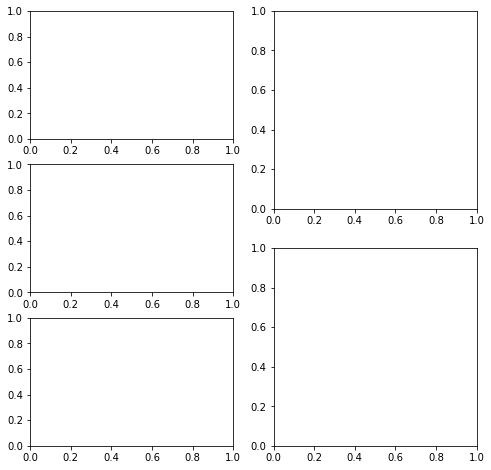

In [28]:
#https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.subplot(3,2,3)
plt.subplot(3,2,5)
plt.subplot(2,2,2)
plt.subplot(2,2,4)

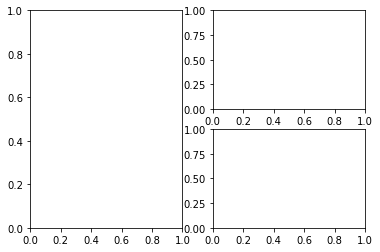

In [29]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)   #top and bottom left
fig.add_subplot(2, 2, 2)   #top right
fig.add_subplot(2, 2, 4)   #bottom right 
plt.show()

In [30]:
import math
#math.log?
print(math.log(8,2))
#math.log(x[, base])
#При передаче функции одного аргумента x, возвращает натуральный логарифм x. 
#При передаче двух аргументов, второй берется как основание логарифма.
#math.log1p(x)
#натуральный логарифм (1 + X). При X → 0 точнее, чем math.log(1+X).
#math.log10(x)
#Возвращает десятичный логарифм x.
#math.pow(x, y)
#Возвращает x в степени y.
#math.sqrt(x)
#Квадратный корень (square root) из x.
#math.exp(x)
#Возвращает ex.
import numpy as np
#np.log2?
print(np.log2([-1, 2, 4]))
print(np.log2(8))

3.0
[nan  1.  2.]
3.0


<ipython-input-30-61ac654271b4>:19: RuntimeWarning: invalid value encountered in log2
  print(np.log2([-1, 2, 4]))


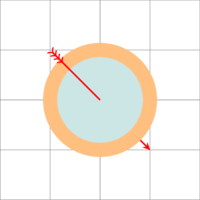

In [31]:
%%tikz  --size 200,200 
    % ";" в конце каждой команды TikZ. 
    % help lines -- это стиль линий сетки
\draw [help lines] (0,0) grid (4,4) ; 

    % -stealth стиль стрелки как у самолета Stealth
\draw [red, -stealth, thick] (2,2) -- (3,1) ;  

    %  заполнение (fill) круга 50% синего 20% зеленого,
    % а цвет линии (draw) смесь 50% оранжевого и прозрачного
    % линия имеет толщину (line width) 8 пунктов
\path [fill=blue!50!green!20, draw=orange!50, line width=8pt] (2,2) circle (1) ; 
 
    % >>>>- Это стиль "хвостовика" линии  
\draw [red, >>>>-, thick] (1,3) -- (2,2) ;

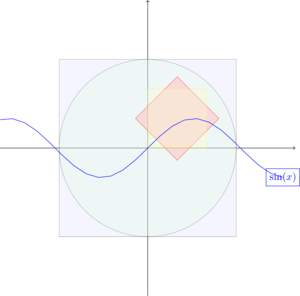

In [32]:
%%tikz --size 300,300 

\definecolor{pf7}{RGB}{166, 118, 29}
\draw[->](-5,0) -- (5,0); 
\draw[->](0,-5) -- (0,5); 


\draw[fill=blue!15, fill opacity=.25] (-3,-3) rectangle (3,3);
\draw[fill=green!15,fill opacity=.25] circle [radius=3cm]; 
\draw[red,shift={(1,1)},rotate=45,fill=red!25,fill opacity=.5] %
          (1,1) -- (1,-1) -- (-1,-1) -- (-1,1) -- (1,1);
\draw[yellow,shift={(1,1)}, fill=yellow!25,fill opacity=.3] %
          (1,1) -- (1,-1) -- (-1,-1) -- (-1,1) -- (1,1);
\draw[color=blue] plot(\x,{sin(\x r)}) node [draw] {$\sin(x)$}
; 

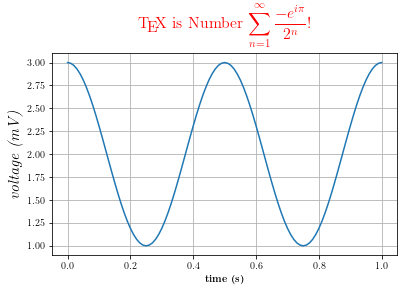

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
plt.figure(1, figsize = (6, 4))
ax = plt.axes([0.1, 0.1, 0.8, 0.7])
t = np.arange(0.0, 1.0+0.01, 0.01)
s = cos(2*2*pi*t)+2
plt.plot(t, s)

plt.xlabel(r'\textbf{time (s)}')
plt.ylabel(r'\textit{voltage (mV)}', fontsize = 16)
plt.title(r"\TeX\ is Number $\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
      fontsize = 16, color = 'r')
plt.grid(True)
plt.savefig('tex_demo')
plt.show()

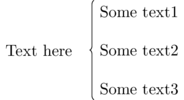

In [34]:
%%tikz -s 200,100

\usetikzlibrary{positioning,decorations.pathreplacing}

\node (main) {Text here};
\begin{scope}[node distance=1em]
    \node [right=of main] (t2) {Some text2};
    \node [above=of t2]   (t1) {Some text1};
    \node [below=of t2]   (t3) {Some text3};
\end{scope}
 \draw[decorate,decoration={brace,mirror}] (t1.north west) -- (t3.south west);

In [ ]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
#www='<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>'
www="""<script>
jQuery(function() 
{if(jQuery("body.notebook_app").length == 0) 
   {jQuery(".input_area").toggle(); 
    jQuery(".prompt").toggle();
   }
});
</script>"""
di.display_html(www, raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Everything hide</button>''', raw=True)

"""
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
"""

print("Markdown not work")

In [ ]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el_last = $(this).find('.cm-variable:last');
      el_first = $(this).find('.cm-variable:first');
      eltikz = $(this).find('.cm-variable:first');
      if(id == 0 || el_last.text() == 'hideMe' || el_first.text() == 'hideMe')
        {$(this).hide();}
      if(id == 0 || eltikz.text() == 'tikz') 
        {$(this).hide();}
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {$(this).show(); });
    $('div.output_prompt').css('opacity', 1);
    $('.input_area').show();
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')